In [32]:
import pandas as pd  
PREPROCESS_PATH_WIN = 'F:/大学/第40期PRP/PRP 测试代码/CNN/congestion.csv'
data = pd.read_csv(PREPROCESS_PATH_WIN)

In [33]:
data

,date,row_id,col_id,time_id,aveSpeed,gridAcc,volume,speedStd,stopNum
0,0,0,0,0,0.000000,0.000000,0,0.000000,0
1,0,0,0,1,0.000000,0.000000,0,0.000000,0
2,0,0,0,2,0.000000,0.000000,0,0.000000,0
3,0,0,0,3,0.000000,0.000000,0,0.000000,0
4,0,0,0,4,0.000000,0.000000,0,0.000000,0
...,...,...,...,...,...,...,...,...,...
7289995,29,29,29,265,3.550290,0.087753,16,2.373306,0
7289996,29,29,29,266,3.564953,-0.091326,19,2.908819,3
7289997,29,29,29,267,5.169833,-0.117639,18,3.702849,1
7289998,29,29,29,268,8.341075,-0.093112,18,5.757029,1


In [34]:
NROWS = int(data.row_id.max() - data.row_id.min() + 1) # 空间网格行数  
NCOLS = int(data.col_id.max() - data.col_id.min() + 1) # 空间网格列数  
NTIME = int(data.time_id.max() - data.time_id.min() + 1) # 时间网格数  
NDATE = 30 # 日期网格数
time_density = 6
space_density = 2
win_s = 10
win_t = 3


In [35]:

# 当前网格数太多了，可以进一步合并
data['hourid'] = data['time_id'] // time_density # 合并时间网格  
data['new_rowid'] = data.row_id // space_density# 合并空间网格  
data['new_colid'] = data.col_id //space_density
congest = data.groupby( # 计算合并网格后各网格的流量  
    ['date', 'new_rowid', 'new_colid', 'hourid']).aveSpeed.mean().reset_index()  
congest.columns = ['date', 'row_id', 'col_id', 'hourid', 'aveSpeed']  

In [36]:
# def congestion_idx(row):
#     row.congestion *= 3.6
#     if(row.congestion == 0 or row.congestion >= 30):
#         row.congestion = 1
#     elif(row.congestion >= 25):
#         row.congestion = 2
#     elif(row.congestion >= 15):
#         row.congestion = 3
#     else:
#         row.congestion = 4
#     return row

In [37]:
# congest['congestion'] = congest['aveSpeed']
# congest = congest.apply(congestion_idx, axis='columns')

In [38]:
TIME_UNIT = data.groupby('hourid').size().count() # 每个date里所包含的hourid的数量
from math import ceil

In [39]:
congest_pivot = congest.pivot_table(  
    index=['date', 'hourid', 'row_id'],  
    columns='col_id',  
    values='aveSpeed').fillna(0).reset_index() # 网格转换  
congest_pivot['timeseq'] = congest_pivot['date'] * TIME_UNIT + congest_pivot['hourid'] # 时间序号  
congest_pivot_np = congest_pivot[[c for c in range(ceil(NCOLS/space_density))]].values # 提取速度数值

In [40]:
congest_pivot

col_id,date,hourid,row_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,timeseq
0,0,0,0,0.000000,0.000000,0.000000,1.572010,0.625771,5.170251,4.522806,0.000000,2.822338,0.000000,0.000000,0.000000,0.000000,0.000000,2.136363,0
1,0,0,1,0.000000,1.079042,2.008077,3.417858,8.985707,0.000000,0.000000,0.000000,3.233342,2.609676,0.000000,0.000000,0.000000,0.000000,3.696465,0
2,0,0,2,0.637160,0.395315,0.000000,7.870842,0.000000,0.000000,0.000000,0.000000,0.000000,7.809963,0.000000,0.000000,0.000000,0.000000,3.701482,0
3,0,0,3,0.000000,0.000000,2.234658,3.665061,0.000000,0.000000,0.000000,0.000000,0.000000,2.069171,5.666757,0.000000,0.000000,0.000000,4.623023,0
4,0,0,4,0.000000,0.192128,4.377896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.335981,0.000000,0.000000,6.635367,3.852265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20245,29,44,10,0.000000,6.868739,6.792977,4.019142,1.878968,0.000000,0.000000,2.036782,0.000000,0.565735,1.127792,7.885290,6.959128,8.866565,5.409717,1349
20246,29,44,11,11.787347,3.508541,0.000000,7.170885,1.280270,1.647388,2.841208,4.496478,0.889727,1.257030,3.604703,5.966925,5.025919,0.000000,5.999312,1349
20247,29,44,12,1.793910,1.552913,0.000000,3.629773,5.659353,2.851531,0.295858,2.338828,4.697543,8.049463,8.389606,7.509960,3.952589,2.362400,11.333515,1349
20248,29,44,13,0.000000,0.808506,4.501413,4.729500,7.925274,0.000000,2.793581,4.143882,3.118764,2.276737,4.737437,5.981565,7.093503,9.088936,10.523238,1349


In [41]:
import numpy as np
np.shape(congest_pivot_np)

(20250, 15)

In [42]:
print((ceil(NROWS),ceil(NCOLS)))

(30, 30)


In [43]:
# 数据增强

def gen_movie(df, nrows=ceil(NROWS/space_density), ncols=ceil(NCOLS/space_density), ntime=30*TIME_UNIT, win_s=win_s, win_t=win_t):  #注意：win_s必须得小于nrows,ncols!!!
    n_i = nrows - win_s + 1   
    n_j = ncols - win_s + 1   
    piece = []  
    for t in range(3*TIME_UNIT - 1, ntime):   #第一天末尾的hourid索引实际上是TIME_UNIT - 1，而不是TIME_UNIT
        for i in range(n_i):  
            for j in range(n_j):  
                # 周期特征  
                prd_piece = df[t-(3*TIME_UNIT - 1) : t - (TIME_UNIT - 1) + 1: TIME_UNIT, i:i+win_s, j:j+win_s]  
                # 邻近特征  
                nbr_piece = df[t-win_t:t+1, i:i+win_s, j:j+win_s]  
                piece.append(np.vstack([prd_piece, nbr_piece]))  
    return np.stack(piece)  

movie = gen_movie(np.asarray(congest_pivot_np.reshape(30*TIME_UNIT, ceil(NROWS/space_density), ceil(NCOLS/space_density)), order='C'))  

In [44]:
np.save('data_x.npy', movie[:, :6])  #TODO:过去三小时的数据
np.save('data_y.npy', movie[:, 6])  #TODO:一、二、三天前的数据

In [45]:
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras.layers import Conv2D, BatchNormalization  
from tensorflow.keras.layers import Activation, MaxPooling2D  
from tensorflow.keras.regularizers import l2
# 卷积层
def conv_layer(inputs,  
             num_filters=16,  
             kernel_size=3,  
             strides=1,  
             data_format='channels_first',  
             activation='relu',  
             batch_normalization=True,  
             maxpooling=True,  
             pool_size=2,  
             pool_strides=2):  
    conv = Conv2D(num_filters,  
                 kernel_size=kernel_size,  
                 strides=strides,  
                 padding='same',  
                 data_format=data_format,  
                 kernel_regularizer=l2(1e-4))  
    x = conv(inputs)  # 卷积
    if batch_normalization:
        x = BatchNormalization()(x) # 批归一化
    if activation is not None:
        x = Activation(activation)(x) # 激活函数
    if maxpooling:
        x = MaxPooling2D(pool_size=pool_size,  
                        strides=pool_strides,  
                        data_format=data_format,  
                        padding='same')(x) # 池化
    return x

In [46]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [47]:

from tensorflow.keras.layers import UpSampling2D  
def upsample_layer(inputs,  
                up_size=2,  
                interpolation='nearest',  
                data_format='channels_first'):
    upsample = UpSampling2D(size=up_size,
                    data_format=data_format,
                    interpolation=interpolation)  
    x = upsample(inputs) # 上采样
    return x

In [48]:
from tensorflow.keras.layers import Input, Flatten, Dense  
from tensorflow.keras.models import Model  
def cnn_model(input_shape):  
    inputs = Input(shape=input_shape)  
    x = conv_layer(inputs, 16, pool_strides=1)  
    x = conv_layer(x, 32, pool_strides=1)  
    x = conv_layer(x, 32, pool_strides=1)  
    x = conv_layer(x, 16)  
    x = upsample_layer(x, 2)  
    x = conv_layer(x, 1, maxpooling=False)  
    y = Flatten(data_format='channels_first')(x)  
    y = Dense(128, activation='relu')(y)  
    y = Dense(128, activation='relu')(y)  
    outputs = Dense(100, activation='relu')(y)  
    # 建立模型  
    model = Model(inputs=inputs, outputs=outputs)  
    return model

In [49]:
import numpy as npdata
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping    
SEED = 233  # 随机种子    
np.random.seed(SEED)    
tf.random.set_random_seed(SEED)

In [120]:
import pandas as pd  
import numpy as np
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras.layers import Conv2D, BatchNormalization  
from tensorflow.keras.layers import Activation, MaxPooling2D  
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import UpSampling2D  
from tensorflow.keras.layers import Input, Flatten, Dense  
from tensorflow.keras.models import Model 
import numpy as npdata
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping
from math import ceil

In [108]:
data_x = np.load('data_x.npy')    
data_y = np.load('data_y.npy')    
data_x = data_x.astype('float32')    
data_y = data_y.astype('float32')

In [ ]:
test_heavy = data_x[]

In [109]:
N_SAMPLE_PER_HOUR = (ceil(NROWS/space_density) - win_s + 1) * (ceil(NCOLS/space_density) - win_s + 1) # 计算数据增强（裁剪）之后，一个hourid内的数据数量
N_SAMPLES_LAST_DAY = TIME_UNIT * N_SAMPLE_PER_HOUR #计算最后一天的样本（数据）量

Max = max(data_x.max(), data_y.max())

data_x /= Max # 归一化  
data_y /= Max # 归一化  #TODO:此处归一化的方法存疑
train_x, train_y = data_x[:-N_SAMPLES_LAST_DAY], data_y[:-N_SAMPLES_LAST_DAY] # 训练集     
test_x, test_y = data_x[-N_SAMPLES_LAST_DAY:], data_y[-N_SAMPLES_LAST_DAY:] # 测试集
model = cnn_model(train_x.shape[1:])      
opt = keras.optimizers.Adam(learning_rate=4e-4)      
model.compile(loss='mse',      
              optimizer=opt,      
              metrics=['mae', 'mse'])      
batch_size = 64 # 训练批次大小    
epochs = 50  # 训练轮数    
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) # 早停策略    
model.fit(train_x, train_y.reshape(-1, 100),      
        batch_size=batch_size,      
        epochs=epochs,       
        validation_split=0.2,      
        callbacks=[earlystop],      
        shuffle=True) # 模型训练

Train on 33724 samples, validate on 8432 samples
Epoch 1/50
33724/33724 [==============================] - 6s 188us/sample - loss: 0.0219 - mean_absolute_error: 0.0798 - mean_squared_error: 0.0157 - val_loss: 0.0126 - val_mean_absolute_error: 0.0533 - val_mean_squared_error: 0.0081
Epoch 2/50
33724/33724 [==============================] - 5s 148us/sample - loss: 0.0095 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0059 - val_loss: 0.0090 - val_mean_absolute_error: 0.0455 - val_mean_squared_error: 0.0063
Epoch 3/50
33724/33724 [==============================] - 5s 150us/sample - loss: 0.0075 - mean_absolute_error: 0.0401 - mean_squared_error: 0.0054 - val_loss: 0.0080 - val_mean_absolute_error: 0.0455 - val_mean_squared_error: 0.0063
Epoch 4/50
33724/33724 [==============================] - 5s 153us/sample - loss: 0.0063 - mean_absolute_error: 0.0382 - mean_squared_error: 0.0050 - val_loss: 0.0064 - val_mean_absolute_error: 0.0408 - val_mean_squared_error: 0.0052
Epoch 5/50
3372

In [110]:
# 计算误差
predictions_test = model.predict(test_x, batch_size=512)    
mae_test = mean_absolute_error(predictions_test * Max, test_y.reshape(-1, 100) * Max)    
mse_test = mean_squared_error(predictions_test * Max, test_y.reshape(-1, 100) * Max)   
print(mae_test, mse_test, np.sqrt(mse_test)) # 测试集误差 

0.6173319 1.0684249 1.0336465


In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(test_y.reshape(-1, 100) * Max, predictions_test * Max)
print(r2)

0.8925524930767688


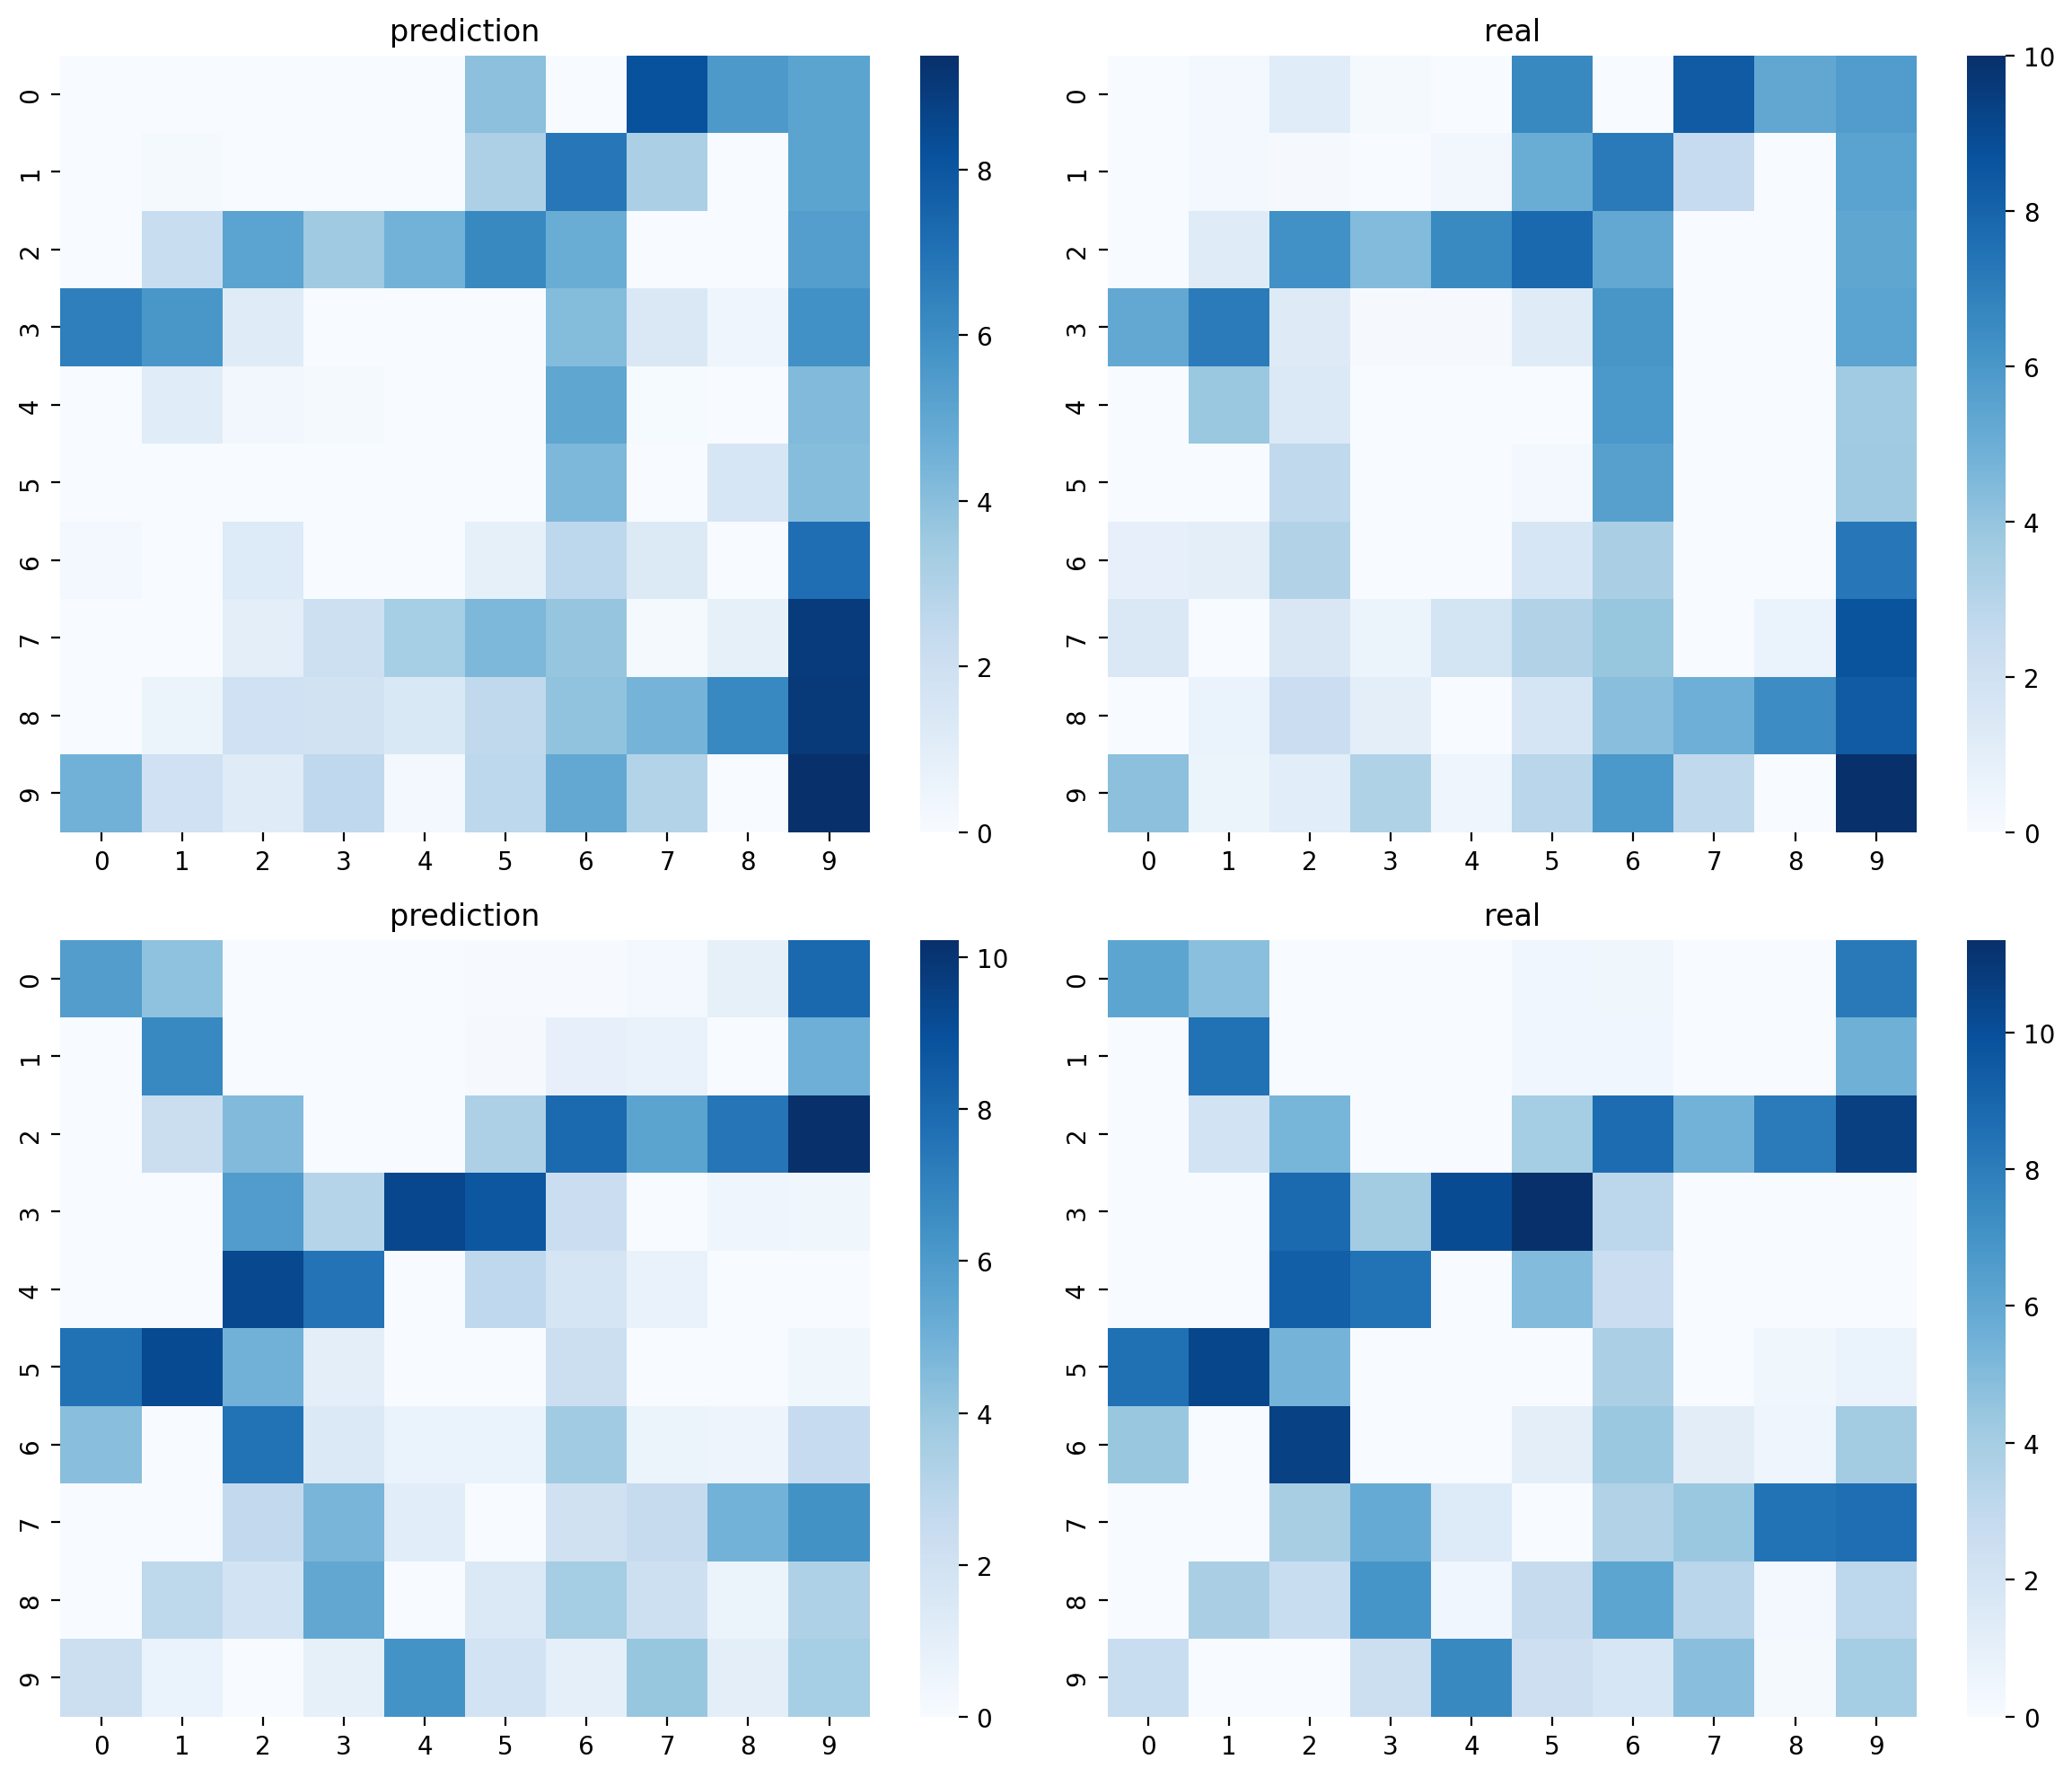

In [112]:
# 预测结果可视化
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12, 10), dpi=200)
for idx, (axi, volframe) in enumerate(zip(ax.ravel(), [
    predictions_test[35].reshape(10,-1),
    test_y[35],
    predictions_test[67].reshape(10,-1),
    test_y[67],
])):
    sns.heatmap(volframe * Max, vmin=0, cmap='Blues', ax=axi)
    if idx % 2 == 0:
        axi.set_title('prediction')
    else:
        axi.set_title('real')
plt.tight_layout()
plt.show()


In [113]:
# 从铺平后的index到原本时空id的映射
def hourId(index:int,) -> int: 
    return (index+1)//N_SAMPLE_PER_HOUR

def rowId(index: int) -> int:
    return ((index+1)%N_SAMPLE_PER_HOUR)//ceil(NROWS/space_density)

def colId(index: int) ->int:
    return ((index+1)&N_SAMPLE_PER_HOUR)%ceil(NROWS/space_density)



# 定义从二维tuple到一维array索引的映射（限定二维平面的shape是(10,10)）
def flattenIndex(row,col):
    #计算卷积核的偏置
    row_offset = (row+1)%10 if (row > 9) else 0
    col_offset = (col+1)%10 if (col > 9) else 0
    #计算偏置还原后，该网格在(10,10)网格中的相对位置
    relativeRowId = row - row_offset
    relativeColId = col - col_offset
    #计算flattenIndex
    return 10*relativeRowId + relativeColId

In [114]:
(NROWS, NCOLS)

(30, 30)

In [115]:
def pickOneGrid(prediction, row_index, col_index, type:int):
    if((col_index > ceil(NCOLS/space_density) - 1) or (col_index < 0) or (row_index > ceil(NROWS/space_density) - 1) or (row_index < 0)):
        raise ValueError('The index is outside the boundary.')
    else:
        # 计算在prediction中对应的所有index
        index = []
        general_offset = 6*((row_index+1)%10 if (row_index > 9) else 0) + ((col_index+1)%10 if (col_index > 9) else 0)
        # 计算相对坐标
        row_offset = (row_index+1)%10 if (row_index > 9) else 0
        col_offset = (col_index+1)%10 if (col_index > 9) else 0
        #计算偏置还原后，该网格在(10,10)网格中的相对位置
        relativeRowId = row_index - row_offset
        relativeColId = col_index - col_offset
        print(f'general_offset is {general_offset}, relative coordinate is ({relativeRowId},{relativeColId})')
        if(type == 0):
            for i in range(np.shape(prediction)[0]):
                if(i%36 == general_offset):
                    index.append(prediction[i][flattenIndex(row_index, col_index)])
        else:
            for i in range(np.shape(prediction)[0]):
                if(i%36 == general_offset):
                    index.append(prediction[i][relativeRowId][relativeColId])
        return index

general_offset is 0, relative coordinate is (0,0)
general_offset is 0, relative coordinate is (0,0)


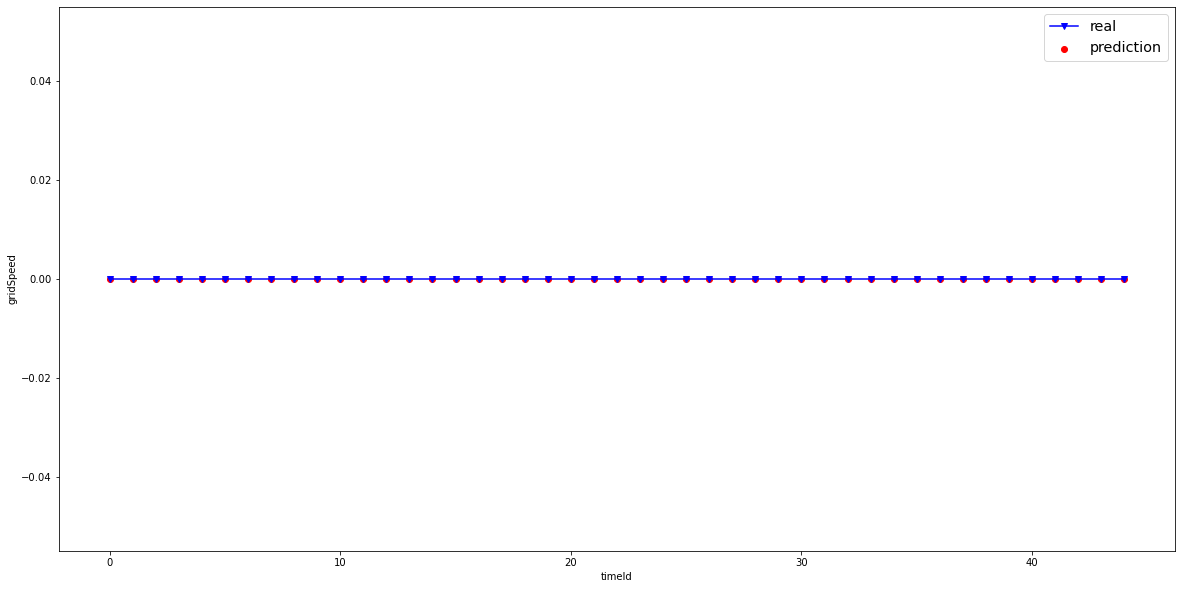

general_offset is 0, relative coordinate is (0,1)
general_offset is 0, relative coordinate is (0,1)


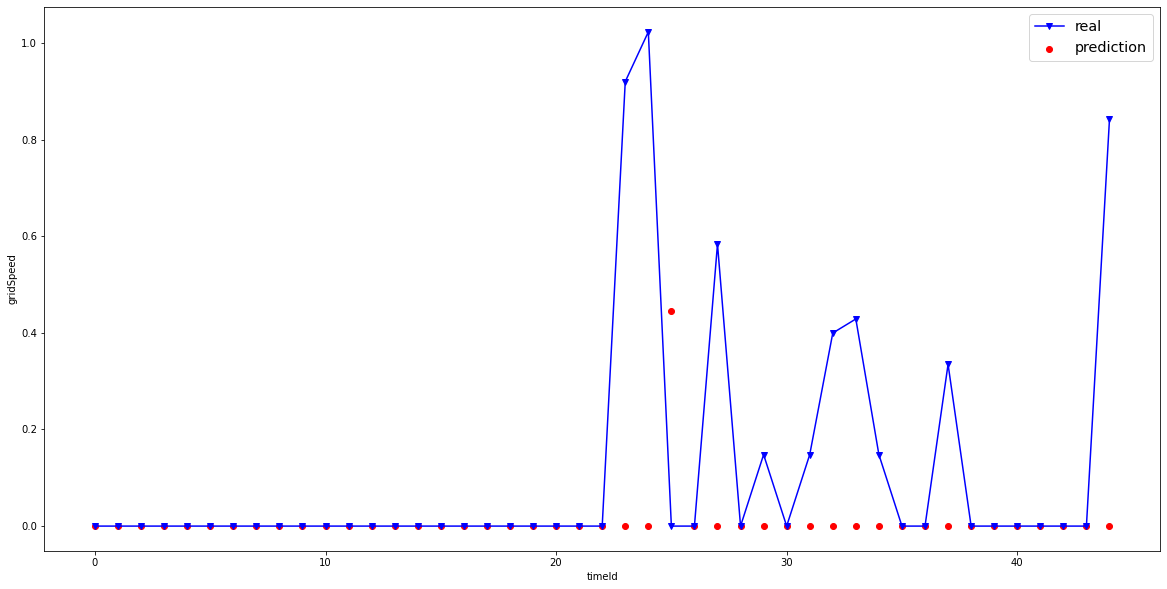

general_offset is 0, relative coordinate is (0,2)
general_offset is 0, relative coordinate is (0,2)


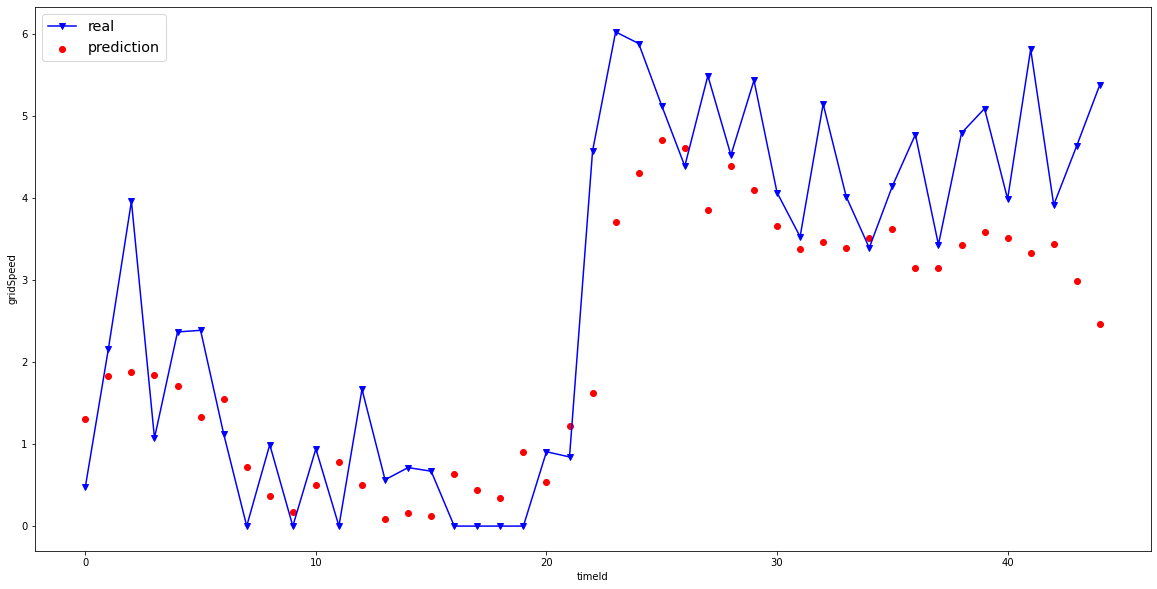

general_offset is 0, relative coordinate is (0,3)
general_offset is 0, relative coordinate is (0,3)


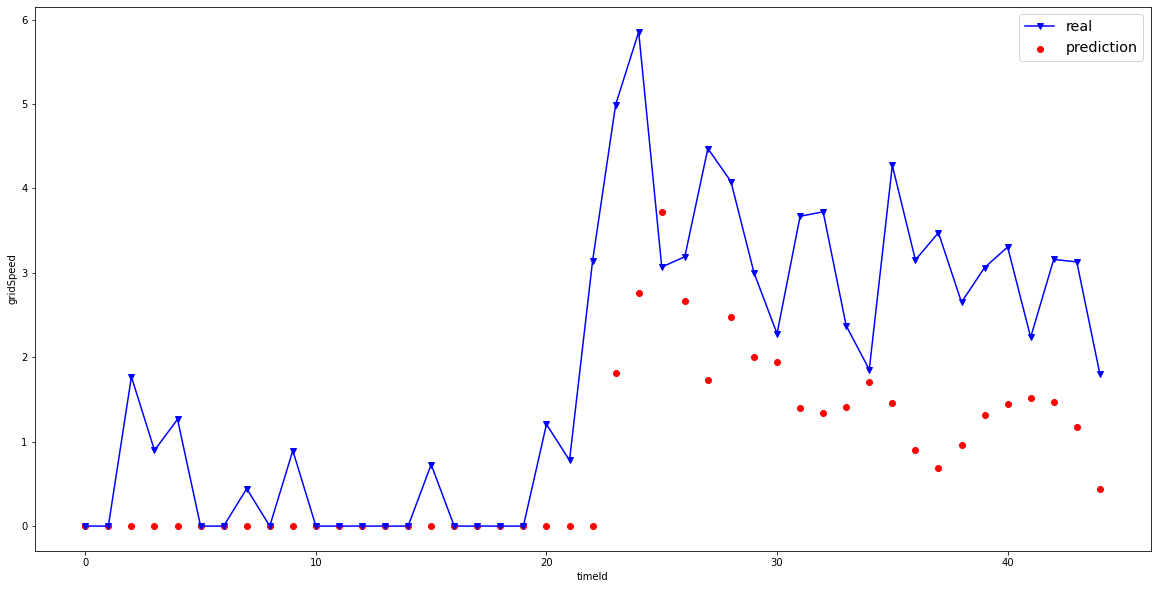

general_offset is 0, relative coordinate is (0,4)
general_offset is 0, relative coordinate is (0,4)


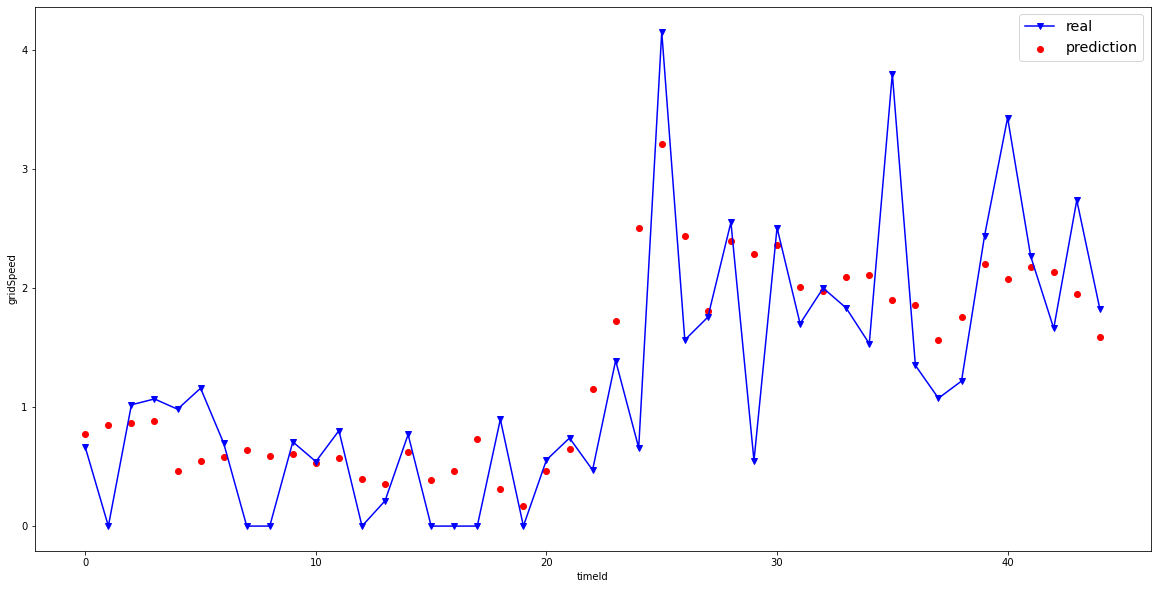

general_offset is 0, relative coordinate is (0,5)
general_offset is 0, relative coordinate is (0,5)


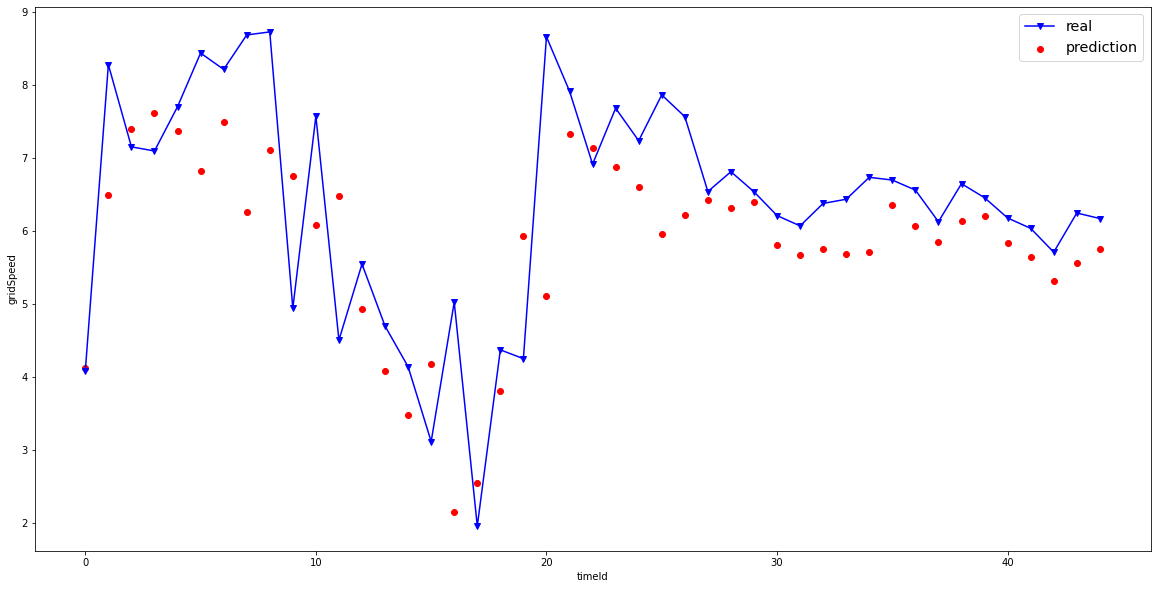

general_offset is 0, relative coordinate is (1,0)
general_offset is 0, relative coordinate is (1,0)


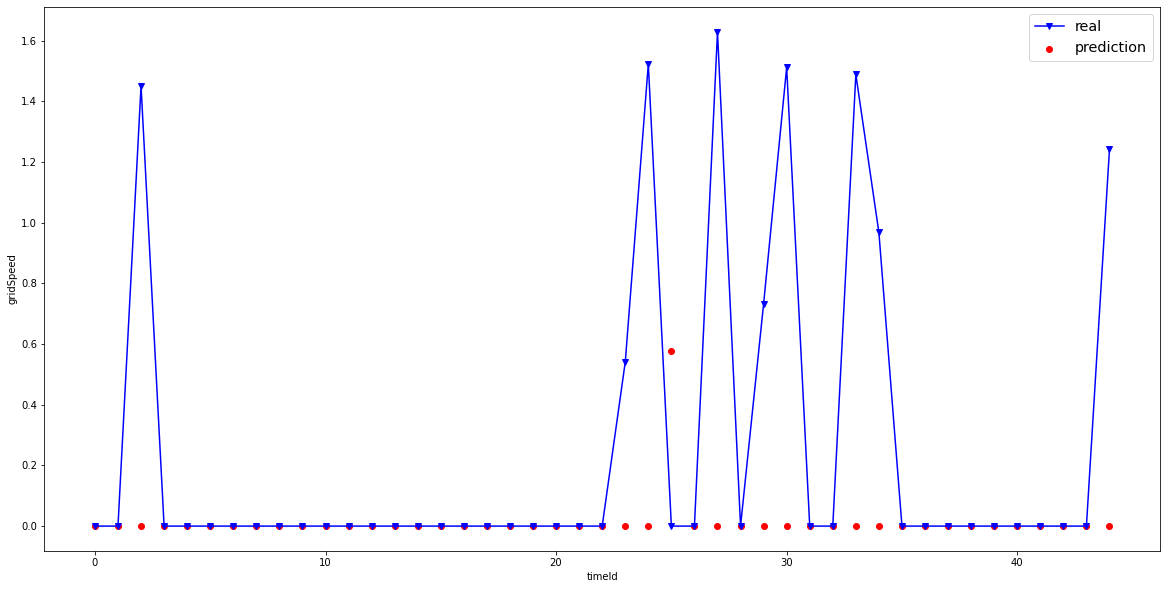

general_offset is 0, relative coordinate is (1,1)
general_offset is 0, relative coordinate is (1,1)


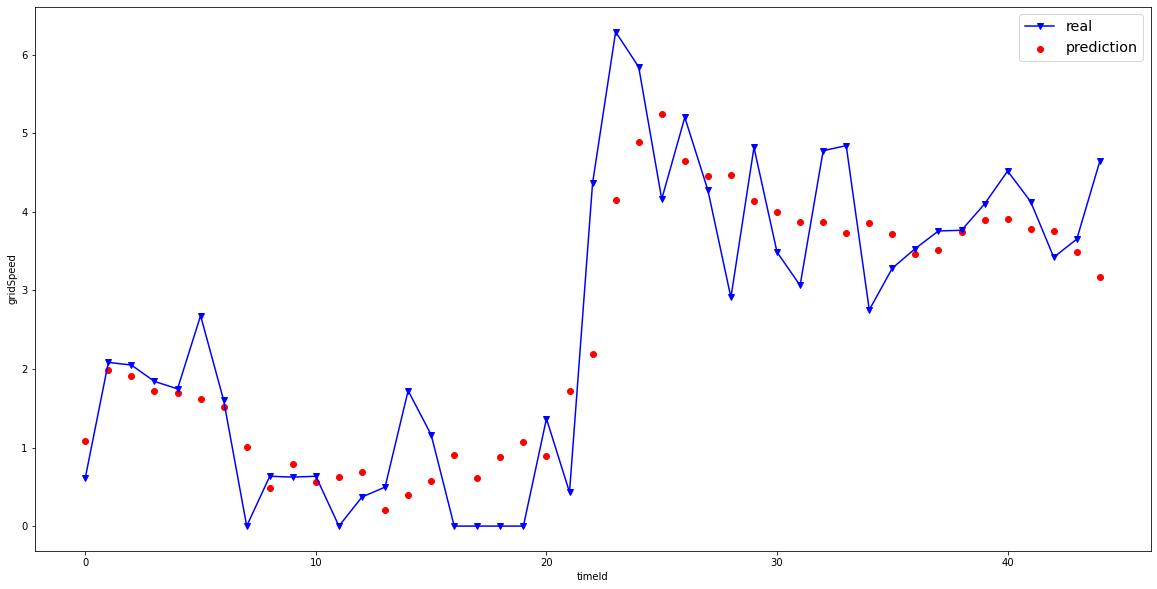

general_offset is 0, relative coordinate is (1,2)
general_offset is 0, relative coordinate is (1,2)


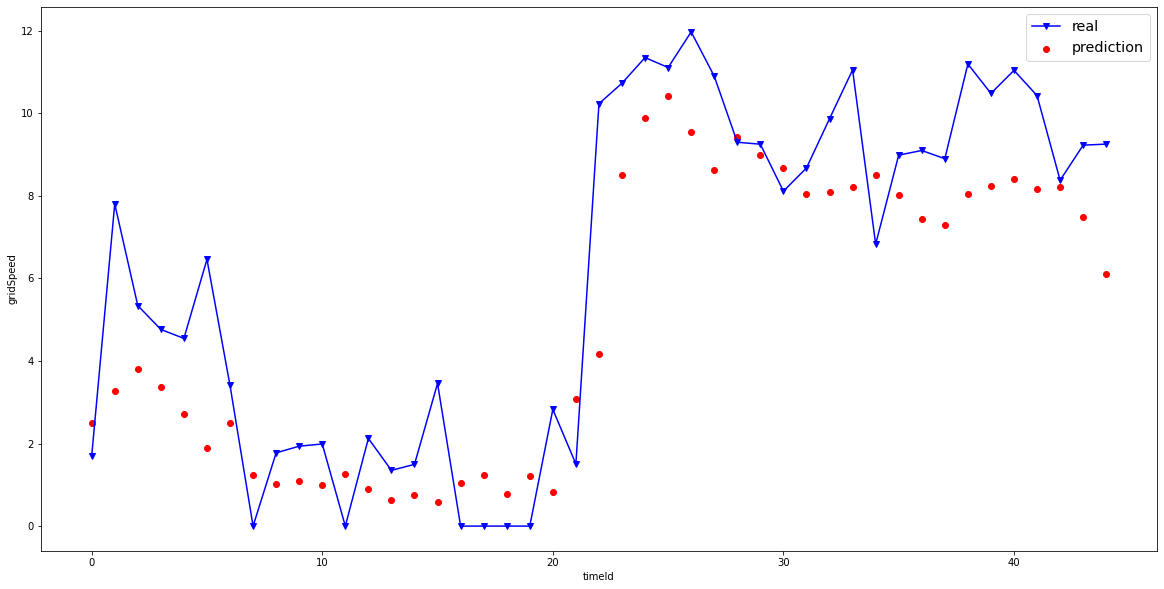

general_offset is 0, relative coordinate is (1,3)
general_offset is 0, relative coordinate is (1,3)


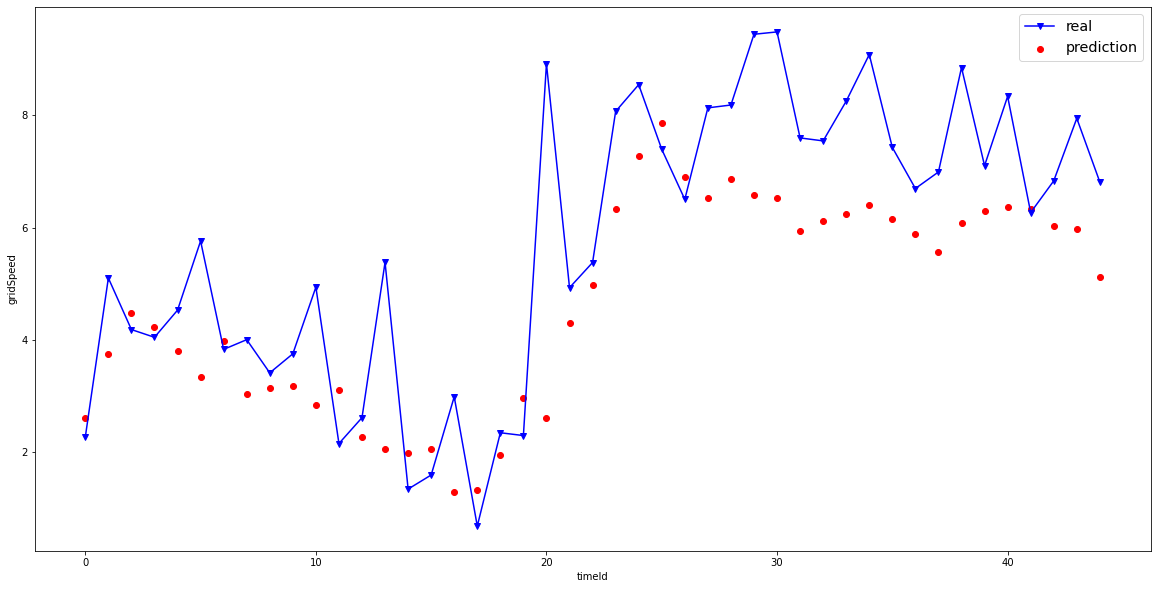

general_offset is 0, relative coordinate is (1,4)
general_offset is 0, relative coordinate is (1,4)


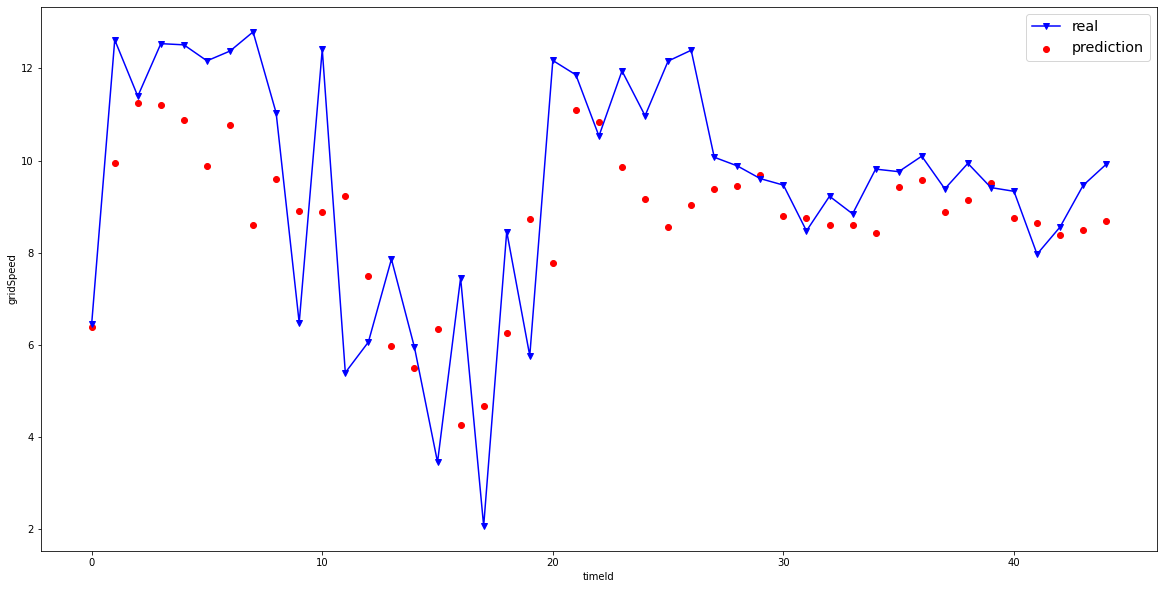

general_offset is 0, relative coordinate is (1,5)
general_offset is 0, relative coordinate is (1,5)


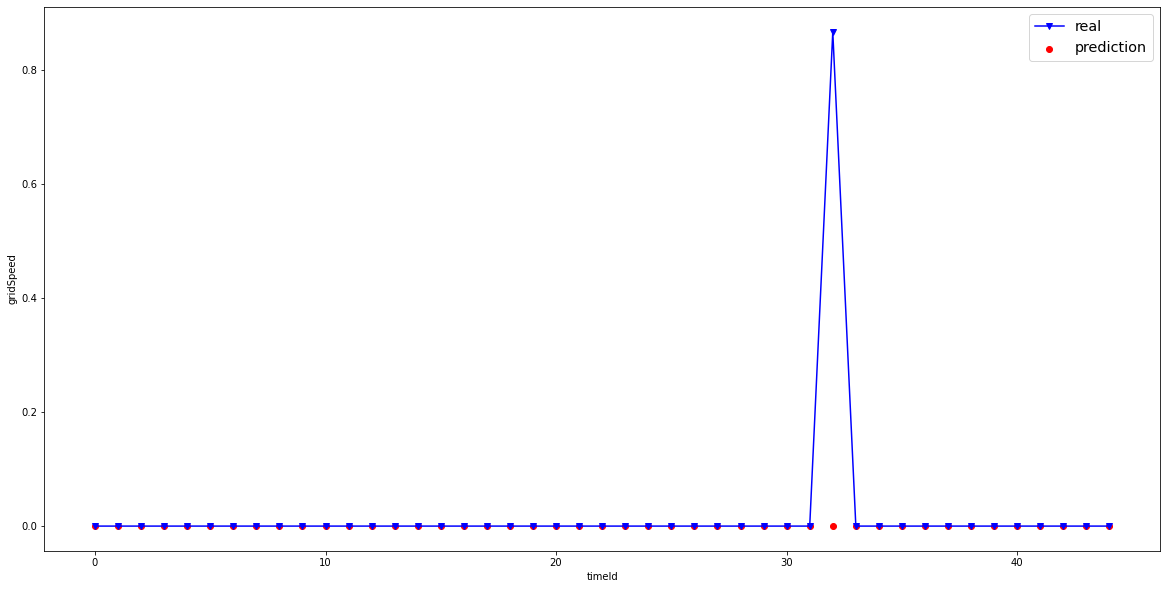

general_offset is 0, relative coordinate is (2,0)
general_offset is 0, relative coordinate is (2,0)


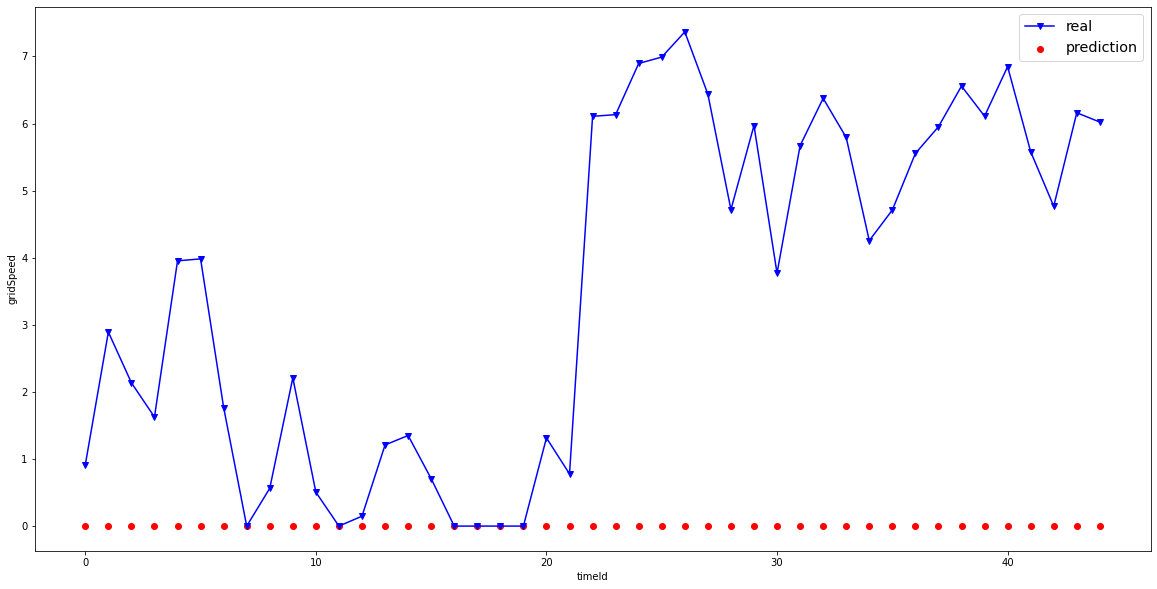

general_offset is 0, relative coordinate is (2,1)
general_offset is 0, relative coordinate is (2,1)


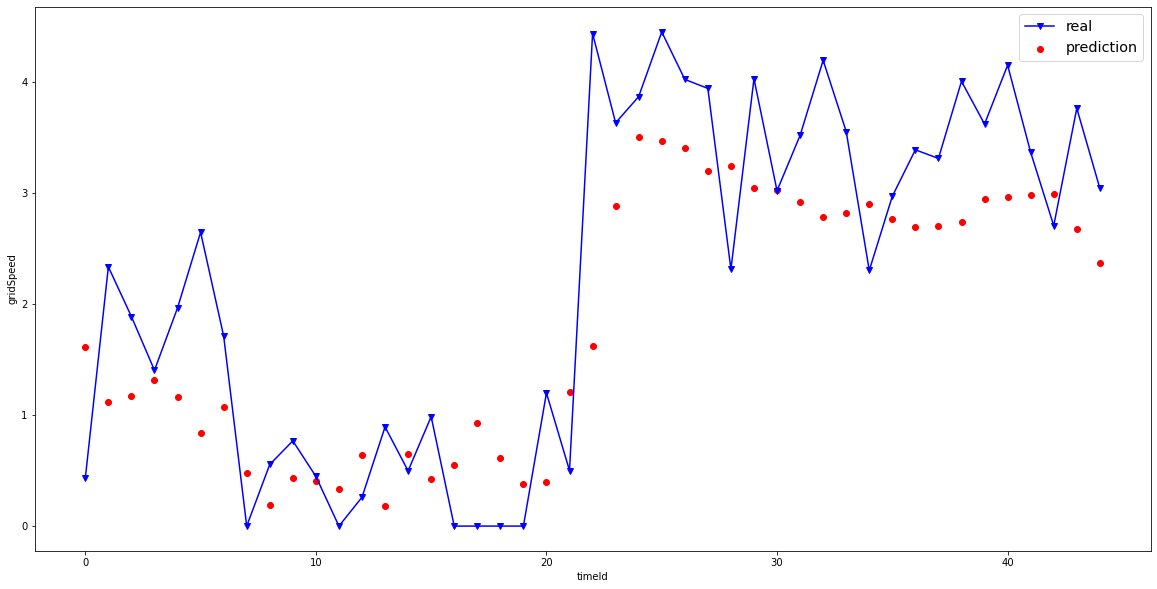

general_offset is 0, relative coordinate is (2,2)
general_offset is 0, relative coordinate is (2,2)


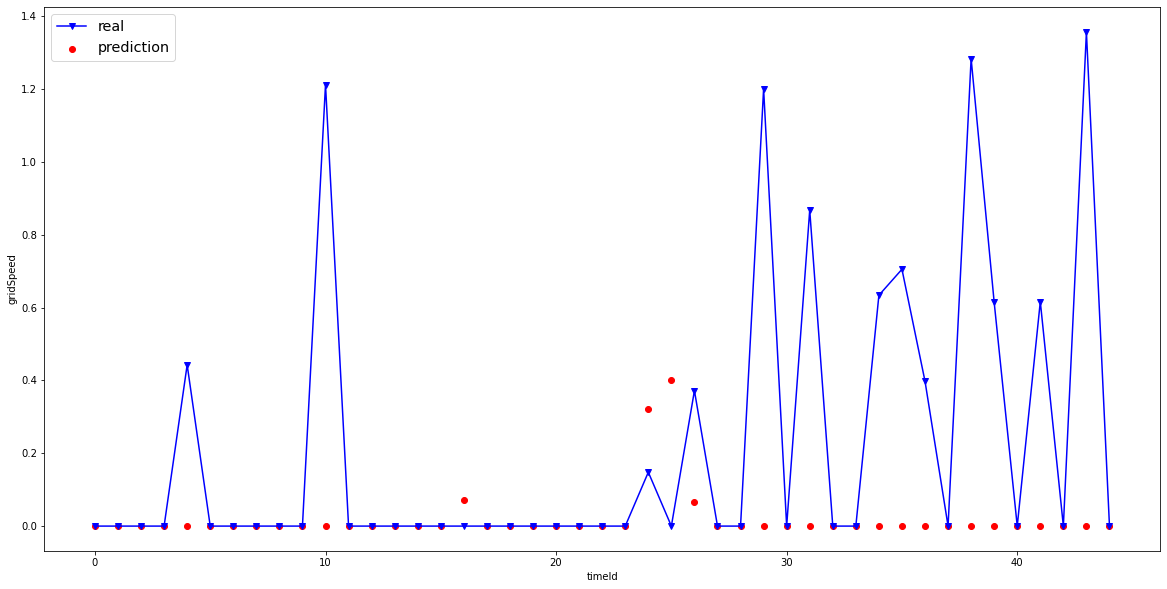

general_offset is 0, relative coordinate is (2,3)
general_offset is 0, relative coordinate is (2,3)


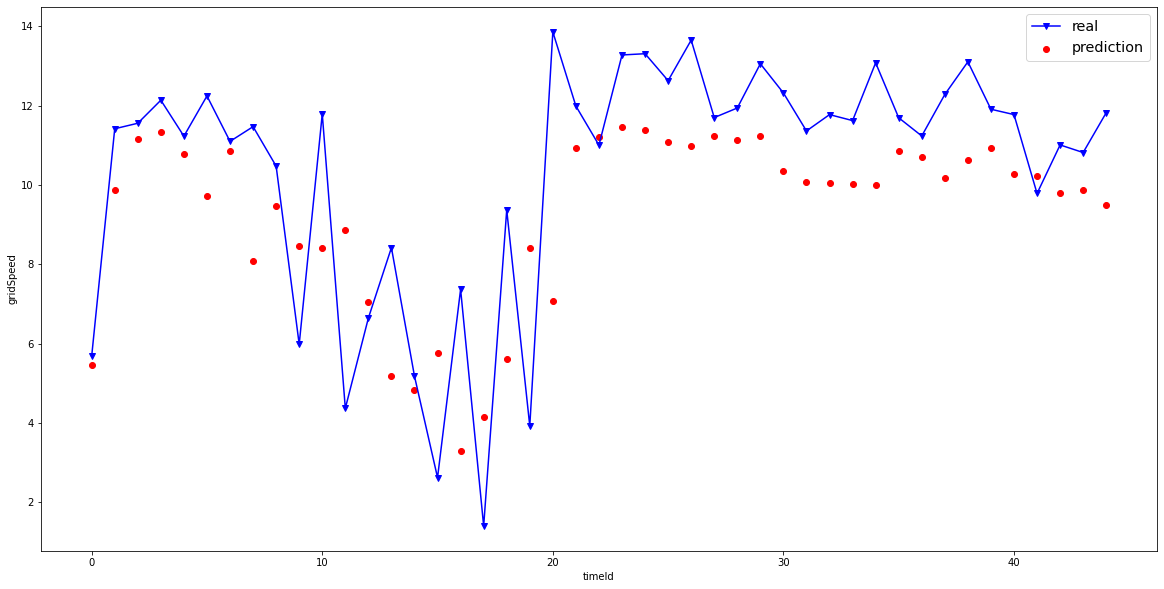

general_offset is 0, relative coordinate is (2,4)
general_offset is 0, relative coordinate is (2,4)


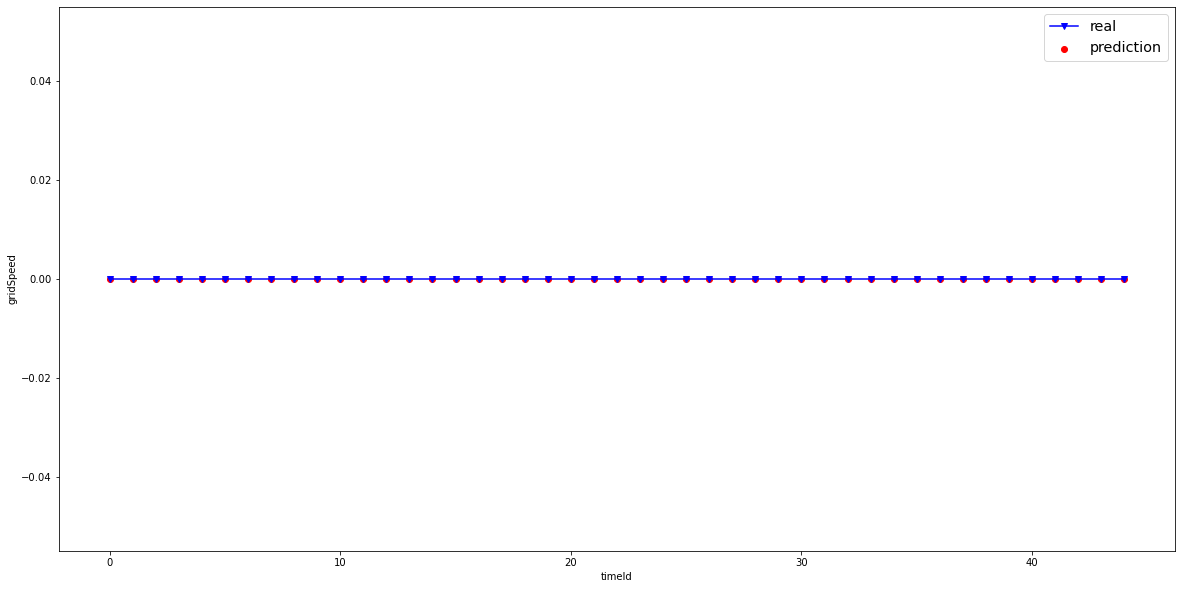

general_offset is 0, relative coordinate is (2,5)
general_offset is 0, relative coordinate is (2,5)


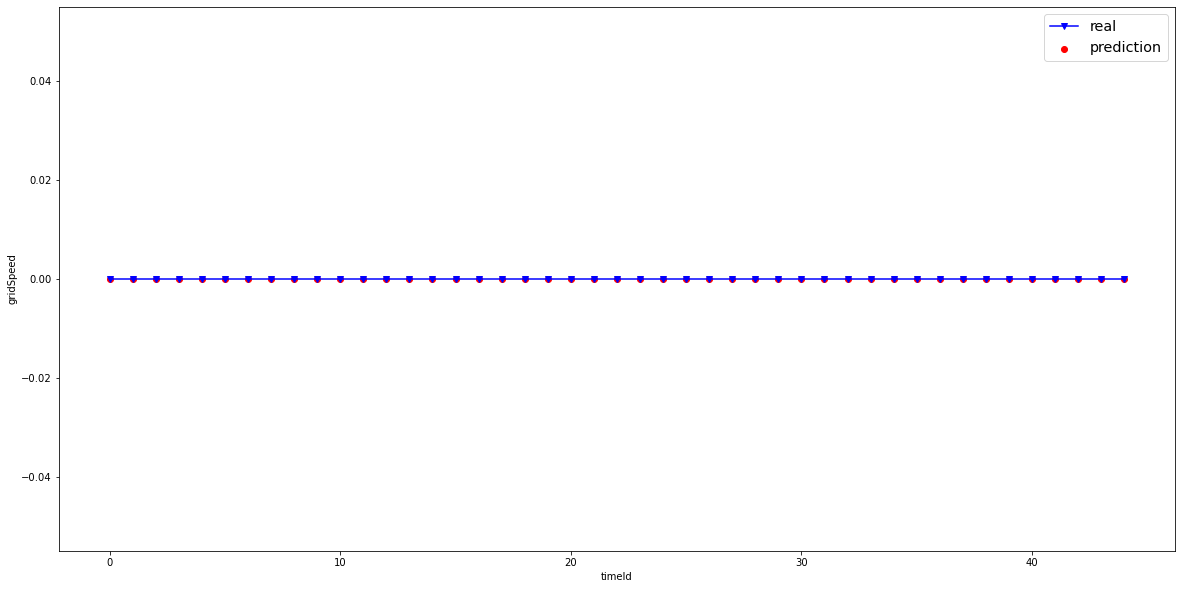

general_offset is 0, relative coordinate is (3,0)
general_offset is 0, relative coordinate is (3,0)


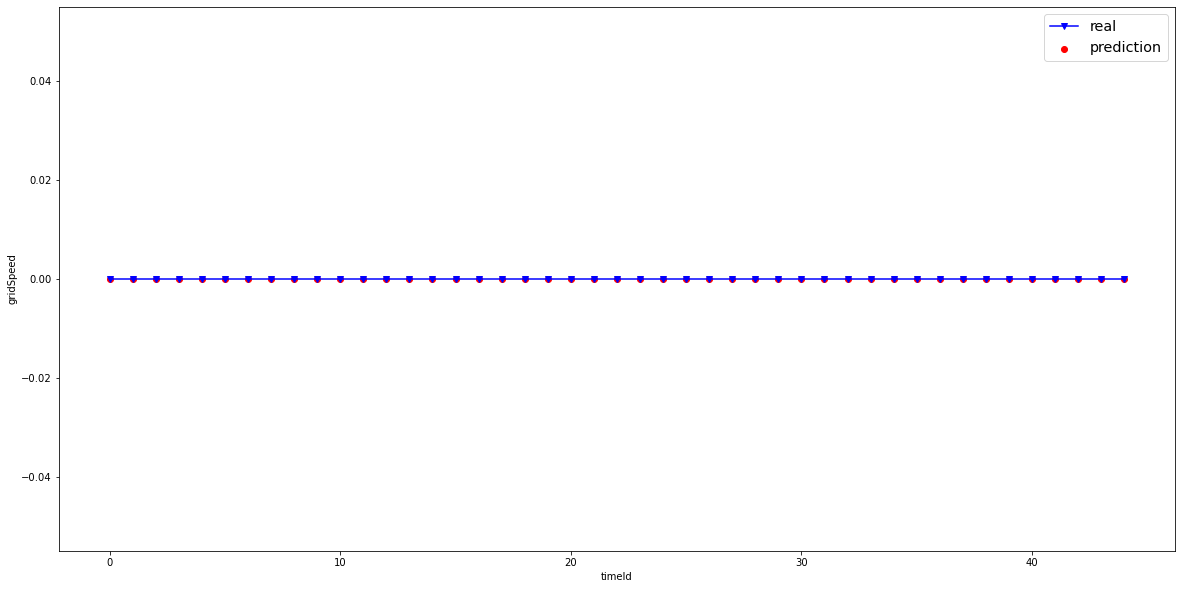

general_offset is 0, relative coordinate is (3,1)
general_offset is 0, relative coordinate is (3,1)


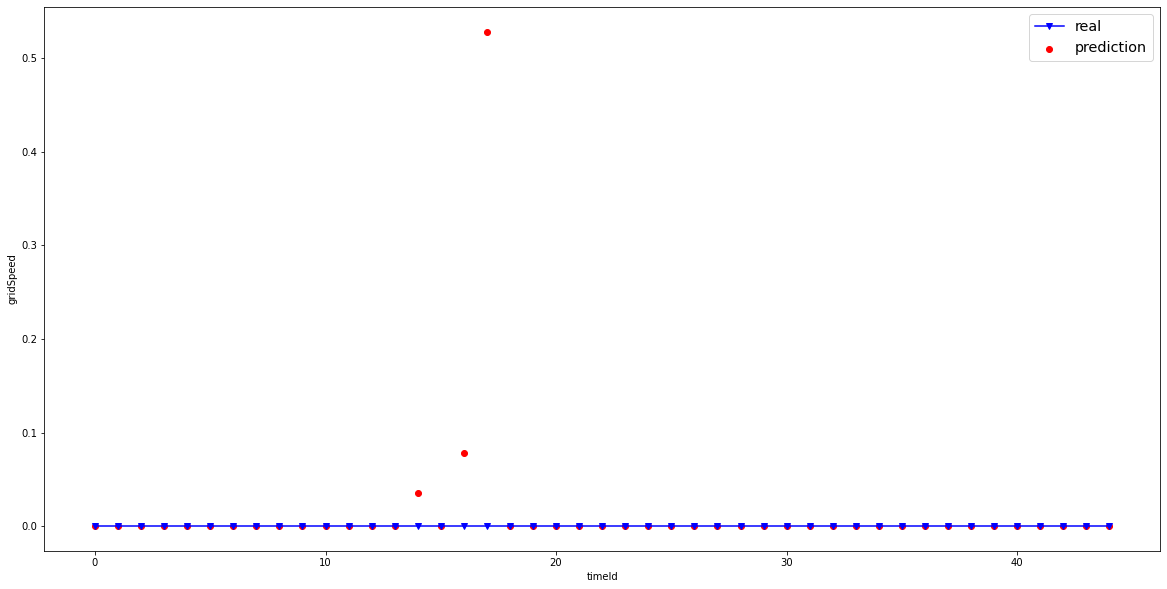

general_offset is 0, relative coordinate is (3,2)
general_offset is 0, relative coordinate is (3,2)


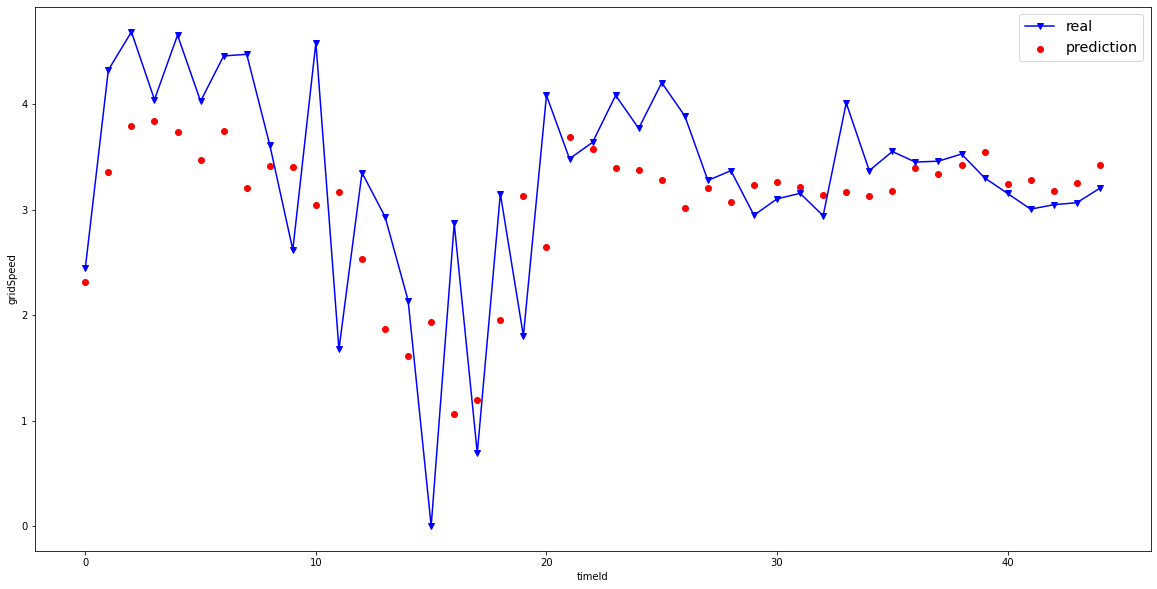

general_offset is 0, relative coordinate is (3,3)
general_offset is 0, relative coordinate is (3,3)


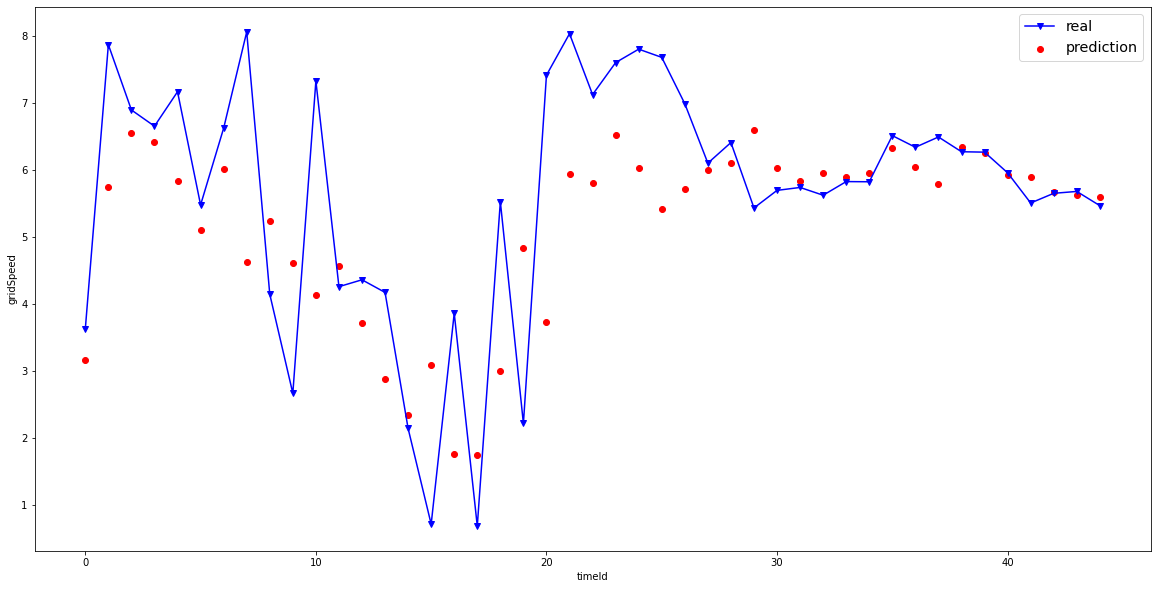

general_offset is 0, relative coordinate is (3,4)
general_offset is 0, relative coordinate is (3,4)


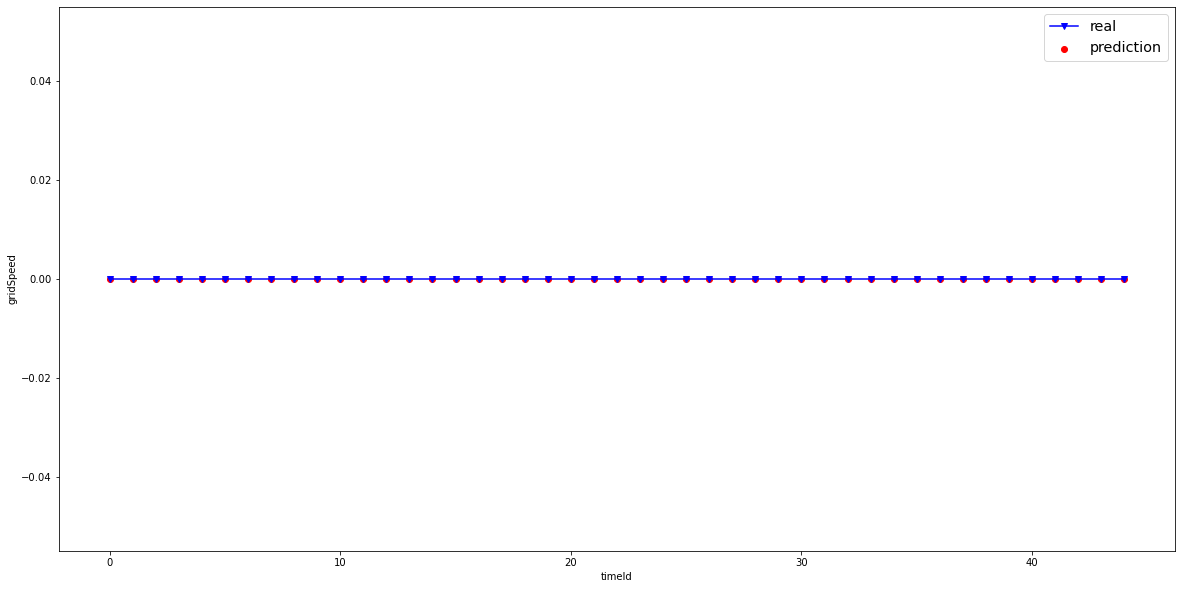

general_offset is 0, relative coordinate is (3,5)
general_offset is 0, relative coordinate is (3,5)


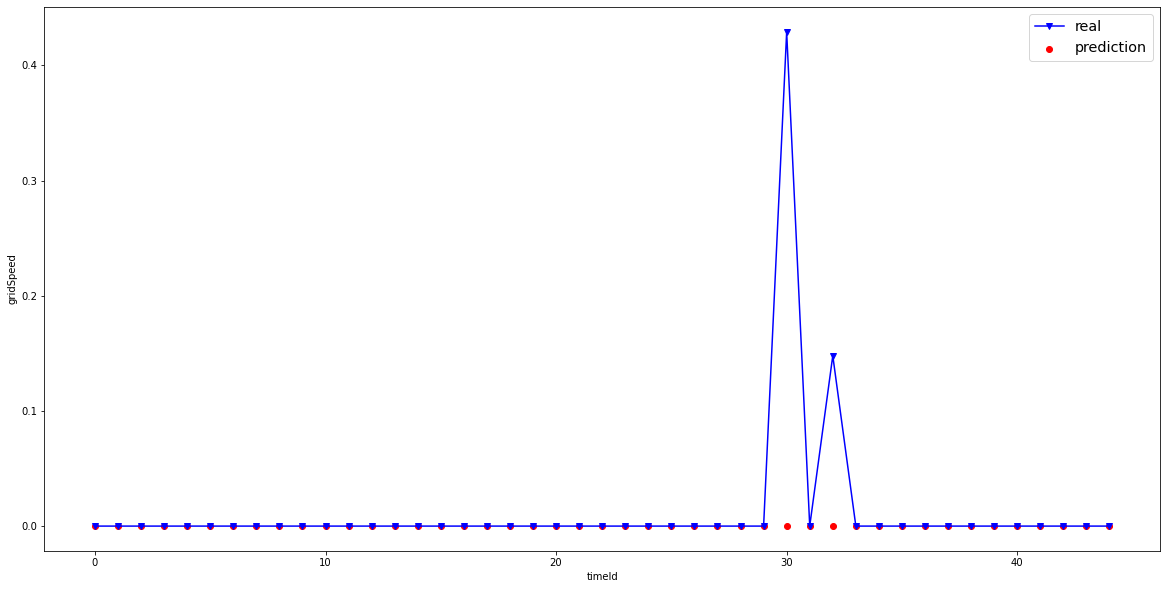

general_offset is 0, relative coordinate is (4,0)
general_offset is 0, relative coordinate is (4,0)


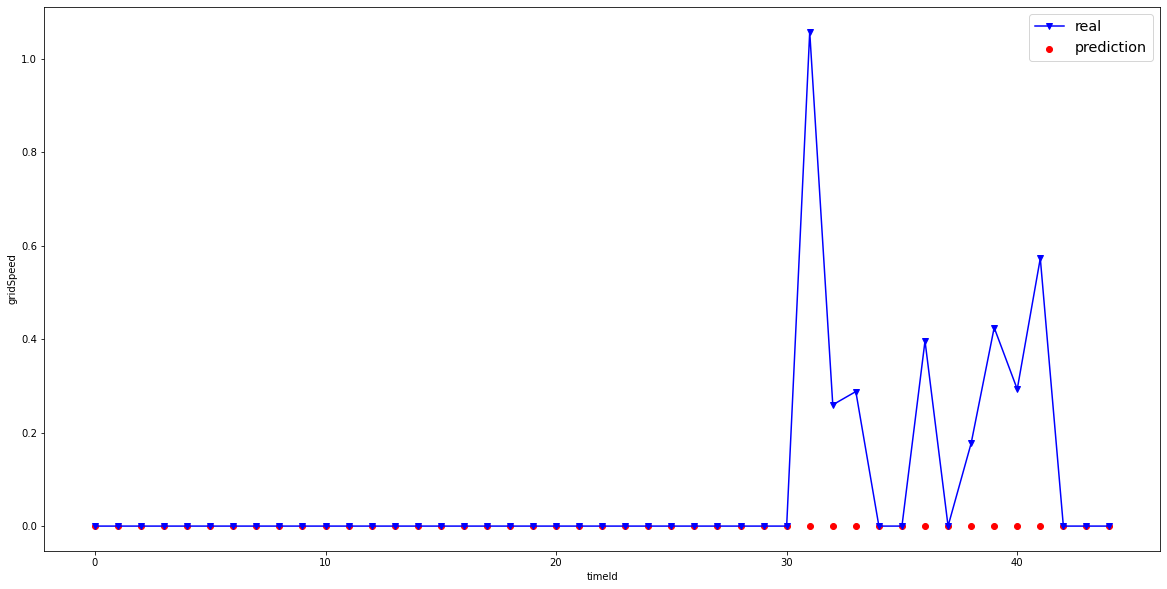

general_offset is 0, relative coordinate is (4,1)
general_offset is 0, relative coordinate is (4,1)


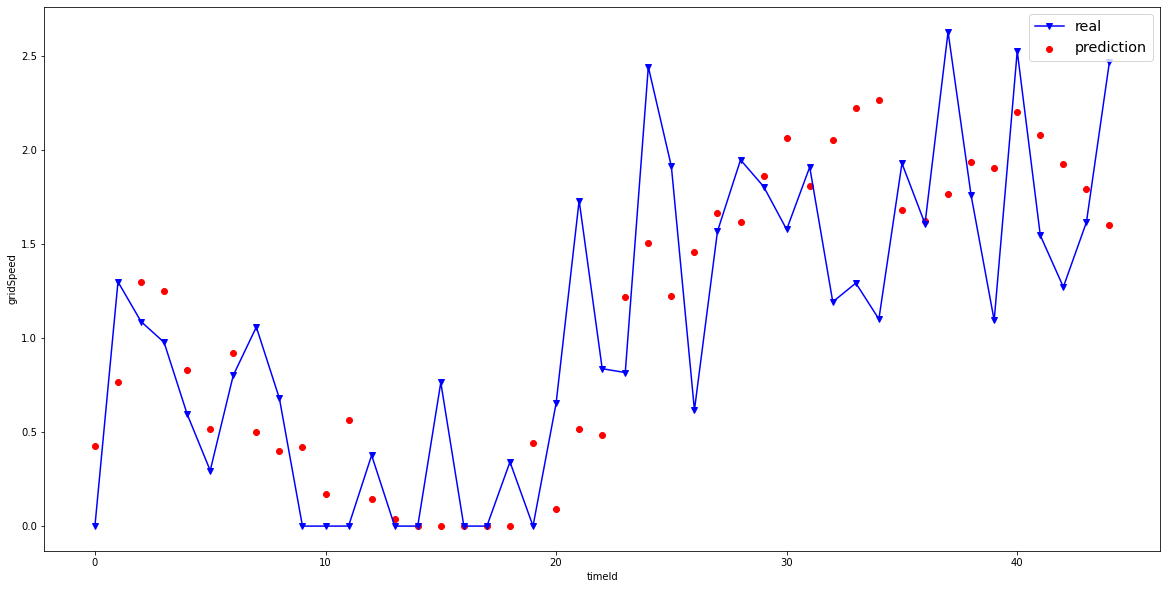

general_offset is 0, relative coordinate is (4,2)
general_offset is 0, relative coordinate is (4,2)


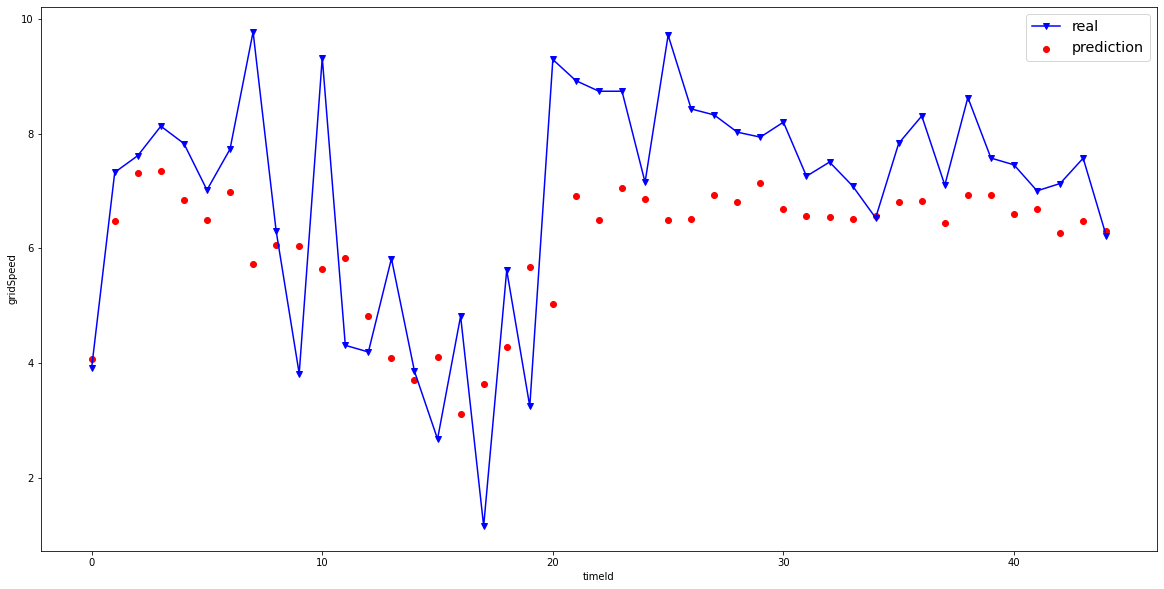

general_offset is 0, relative coordinate is (4,3)
general_offset is 0, relative coordinate is (4,3)


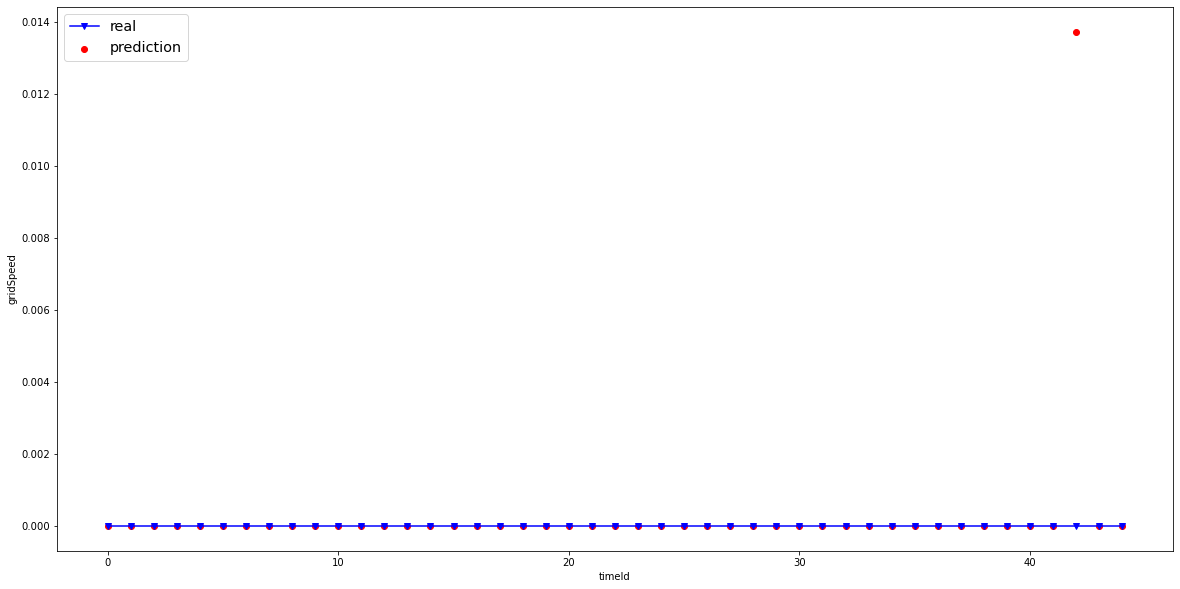

general_offset is 0, relative coordinate is (4,4)
general_offset is 0, relative coordinate is (4,4)


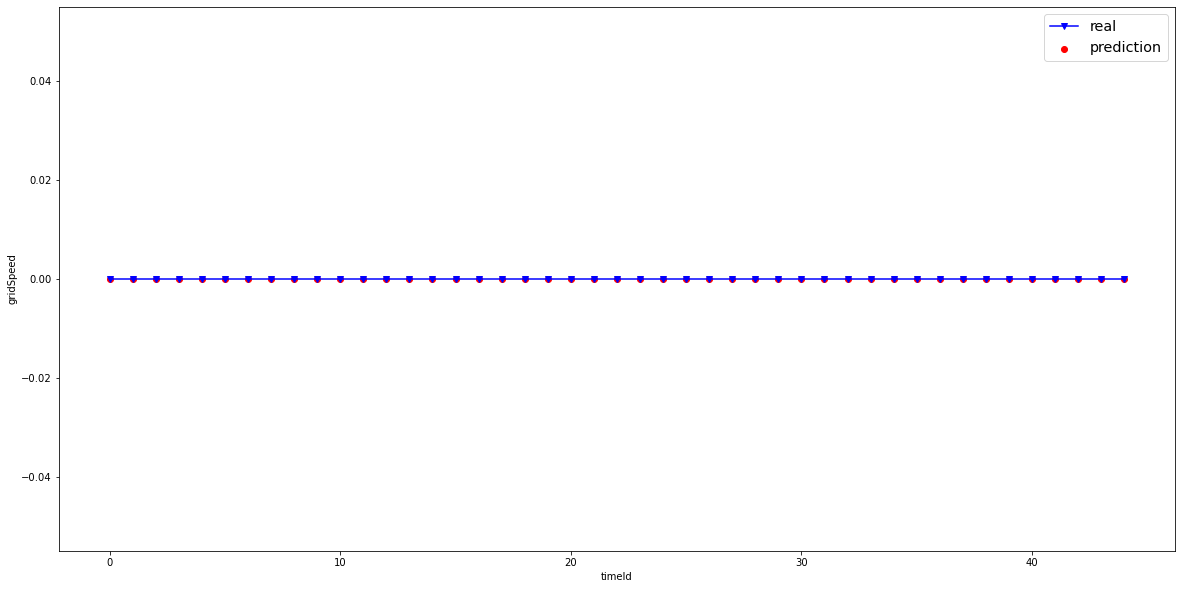

general_offset is 0, relative coordinate is (4,5)
general_offset is 0, relative coordinate is (4,5)


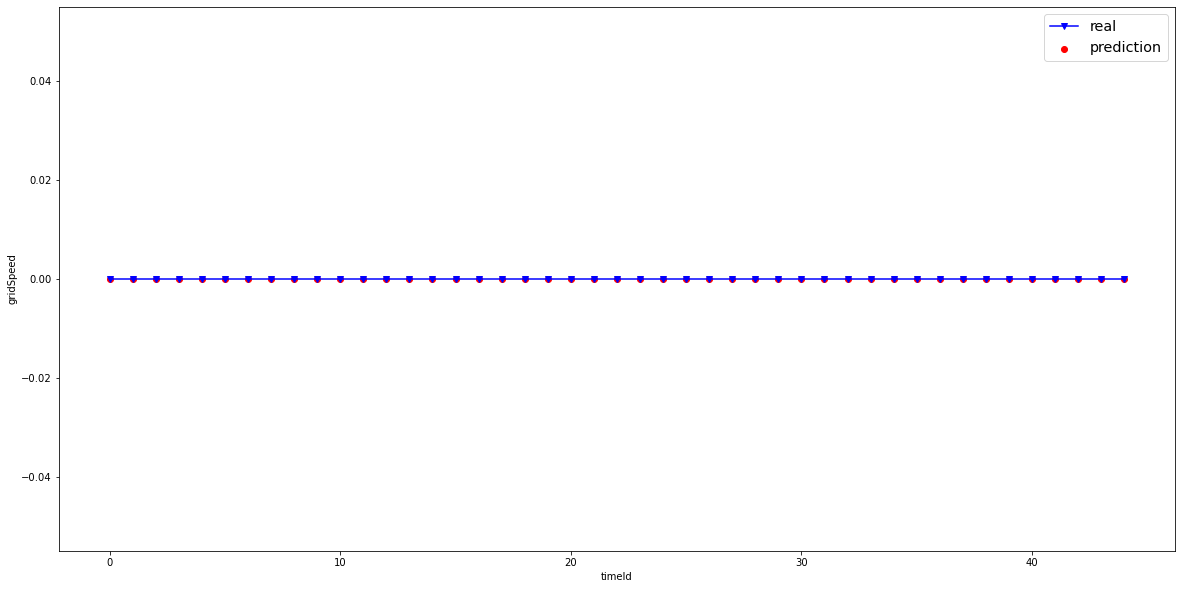

general_offset is 0, relative coordinate is (5,0)
general_offset is 0, relative coordinate is (5,0)


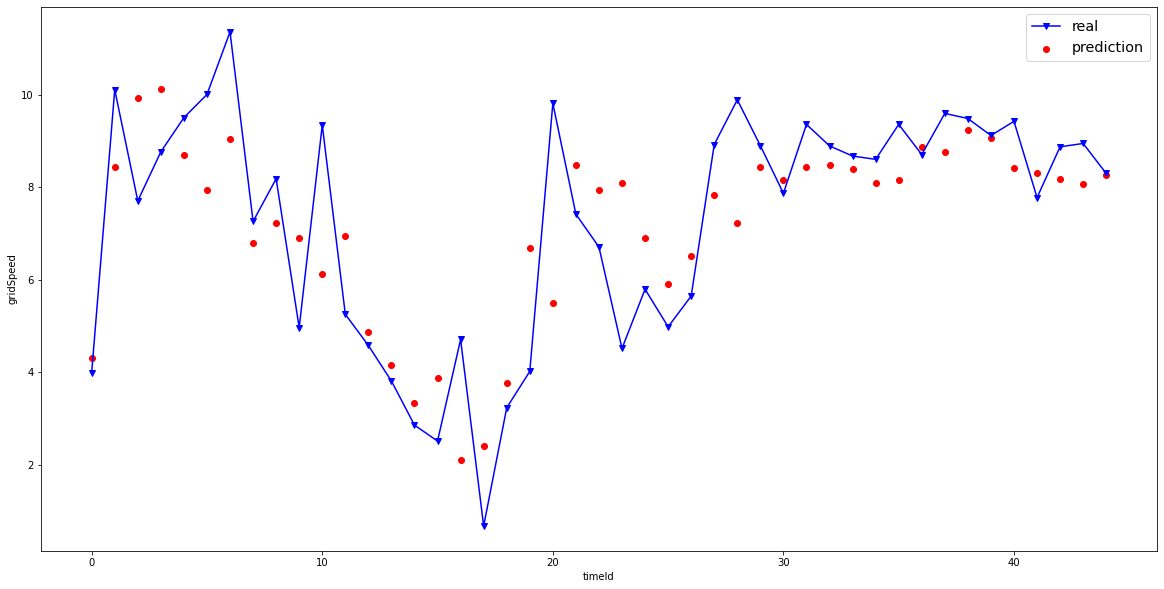

general_offset is 0, relative coordinate is (5,1)
general_offset is 0, relative coordinate is (5,1)


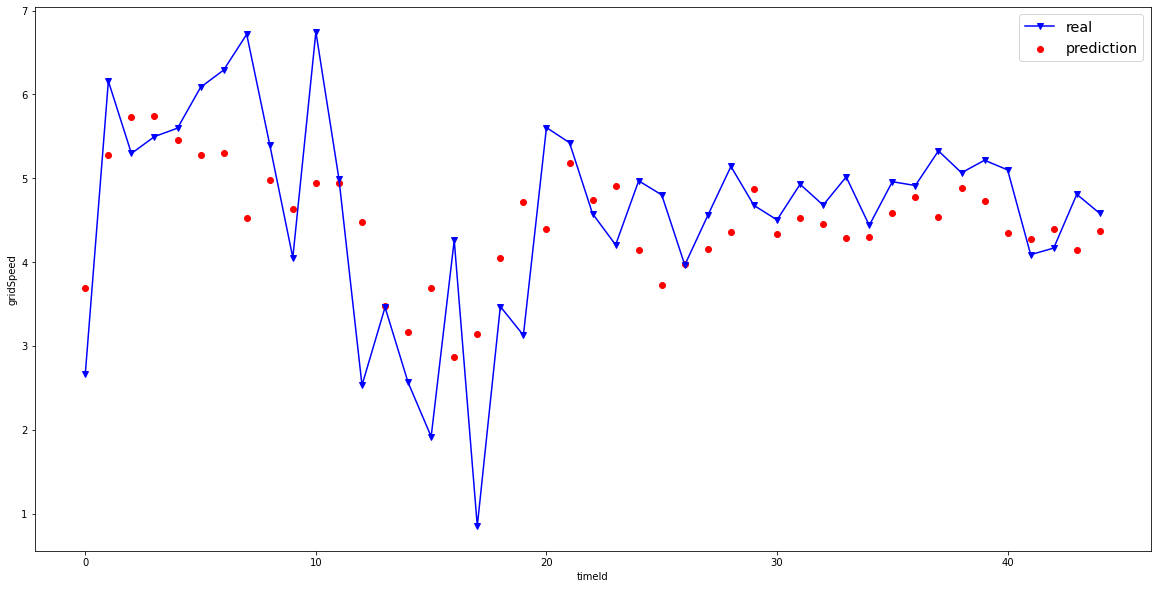

general_offset is 0, relative coordinate is (5,2)
general_offset is 0, relative coordinate is (5,2)


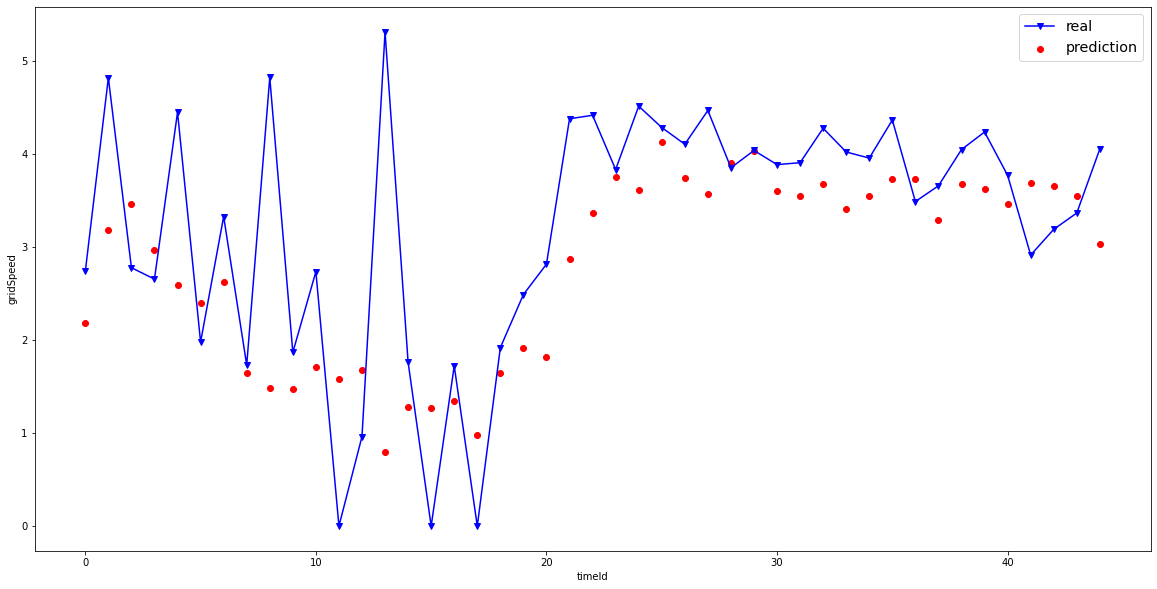

general_offset is 0, relative coordinate is (5,3)
general_offset is 0, relative coordinate is (5,3)


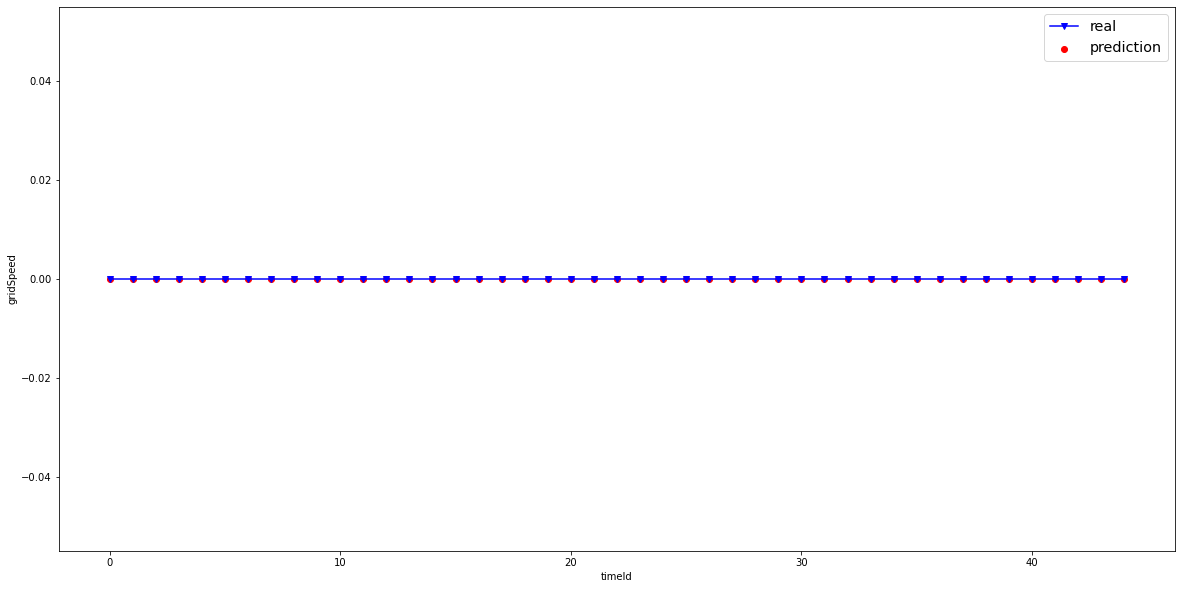

general_offset is 0, relative coordinate is (5,4)
general_offset is 0, relative coordinate is (5,4)


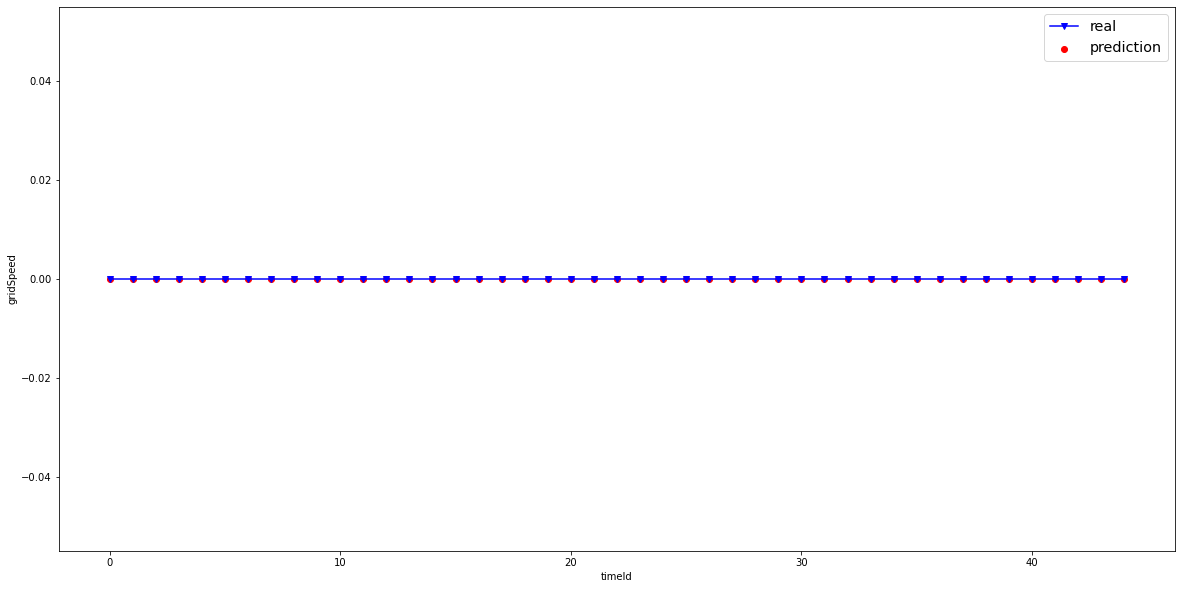

general_offset is 0, relative coordinate is (5,5)
general_offset is 0, relative coordinate is (5,5)


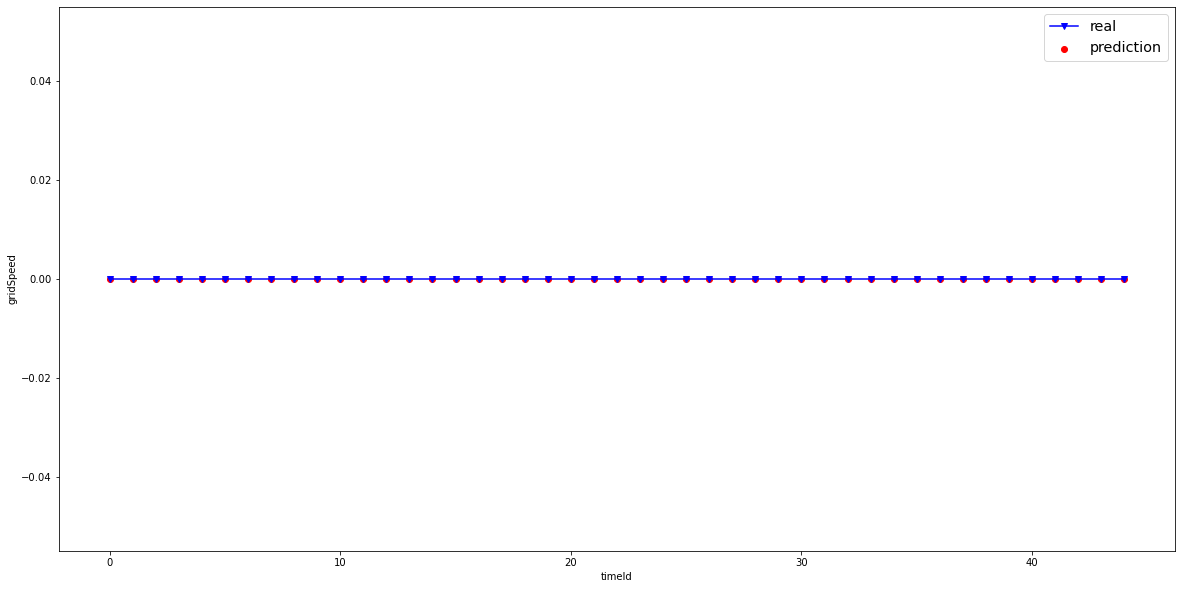

In [116]:
# 选择网格
for i in range(6):
    for j in range(6):
        cord = (i,j)
        last_day_predict = np.array(pickOneGrid(predictions_test, cord[0], cord[1], type=0))*Max
        last_day_real    = np.array(pickOneGrid(test_y, cord[0], cord[1], type=1))*Max

        # 画图
        fig, ax = plt.subplots(figsize=(20,10))
        ax.scatter(range(np.shape(last_day_predict)[0]), last_day_predict, c='r', marker='o', label='prediction')
        ax.plot(range(np.shape(last_day_real)[0]), last_day_real, c='b', marker='v', label='real')
        ax.set_xlabel('timeId')
        ax.set_ylabel('gridSpeed')
        legend = ax.legend(fontsize='x-large')
        plt.show()